# Data Visualization EDA

## *Overview*
Public and non-profit enitities are eligible to receive Health Center Program grant funding to provide medical, dental, and mental health services to underserved individuals across the United States and its territories. Entities that receive this funding are charged with increasing access to quality health care services to medically underserved populations. 

In this notebook, I will visually explore the relationships between various features of each entity and whether they are correlated with the total health center funding an entity receives. 

[Link to Data Definitions](https://bphc.hrsa.gov/sites/default/files/bphc/data-reporting/2022-uds-manual.pdf)

In [1]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, parent_dir)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import plotly.express as px
from configuration.config import DATA_PATH

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Update on 7/11/24 
I am using a new version of my dataset that does not include imputations for health center ops and finance columns. See notes at the end of the data wrangling notebook for more information.

In [4]:
health_centers = pd.read_csv(DATA_PATH + 'clean_data_v2.csv')

In [5]:
health_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 84 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BHCMISID                            1368 non-null   object 
 1   GrantNumber                         1368 non-null   object 
 2   HealthCenterName                    1368 non-null   object 
 3   HealthCenterCity                    1368 non-null   object 
 4   HealthCenterState                   1368 non-null   object 
 5   FundingCHC                          1368 non-null   bool   
 6   FundingMHC                          1368 non-null   bool   
 7   FundingHO                           1368 non-null   bool   
 8   FundingPH                           1368 non-null   bool   
 9   UrbanRuralFlag                      1368 non-null   object 
 10  mhc_amount                          1368 non-null   int64  
 11  chc_amount                          1368 no

The clean dataset has 84 columns and 1344 observations. Several columns from the oepartions and finance table contain missing values that are missing not at random.

In [6]:
health_centers.columns

Index(['BHCMISID', 'GrantNumber', 'HealthCenterName', 'HealthCenterCity',
       'HealthCenterState', 'FundingCHC', 'FundingMHC', 'FundingHO',
       'FundingPH', 'UrbanRuralFlag', 'mhc_amount', 'chc_amount', 'ho_amount',
       'ph_amount', 'total_hc_funding', 'bphc_total',
       'total_other_federal_grants', 'total_state_grants',
       'total_local_gov_grants', 'total_private_grants', 'total_other_revenue',
       'total_revenue', 'total_male', 'total_female', 'asian',
       'native_hawaiian', 'pac_isl', 'black', 'am_ind', 'white', 'unreported',
       'hispanic_any_race', 'total_patients', 'lep_patients', 'fpl_100_below',
       'fpl_101_to_150', 'fpl_151_to_200', 'fpl_over_200', 'fpl_unknown',
       'uninsured_0_17', 'uninsured_18_up', 'medicaid_0_17', 'medicaid_18_up',
       'medicare_18_up', 'public_insurance_0_17', 'public_insurance_18_up',
       'private_insurance_0_17', 'private_insurance_18_up', 'total_0_17',
       'total_18_up', 'migrant_patients', 'homeless_patients'

In [7]:
health_centers.head(3)

BHCMISID GrantNumber                          HealthCenterName  \
0   010030  H80CS00803               HOLYOKE HEALTH CENTER, INC.   
1   010040  H80CS00443          MAINE MOBILE HEALTH PROGRAM INC.   
2   010060  H80CS00741  FAIR HAVEN COMMUNITY HEALTH CLINIC, INC.   

  HealthCenterCity HealthCenterState  FundingCHC  FundingMHC  FundingHO  \
0          Holyoke                MA        True       False      False   
1          Augusta                ME       False        True      False   
2        New Haven                CT        True       False      False   

   FundingPH UrbanRuralFlag  ...  enabling_virtual_visits  enabling_patients  \
0      False          Urban  ...                      NaN                NaN   
1      False          Rural  ...                    175.0              263.0   
2      False          Urban  ...                   5057.0             3539.0   

   total_clinic_visits  total_virtual_visits  ZipCode_Count  SiteCity_Count  \
0                  NaN                   NaN             50               3   
1               2381.0                 192.0             24               2   
2              96387.0               27893.0             62               3   

   SiteState_Count  Admin_Service_Delivery_Sites_Count  \
0                1                                   0   
1                1                                   4   
2                1                                   1   

   Service_Delivery_Sites_Count  TotalWeeklyHoursOfOperation  
0                             4                        175.0  
1                             2                        195.0  
2                            16                        603.0  

[3 rows x 84 columns]

## Health Center Funding and Patients Served

I first want to take a look at the distribution of health center funding, total patients served, and any correlation between these variables across entities. I also want to see if there are any particular clusters around funding and whether an entity is considered a rural or urban provider. 

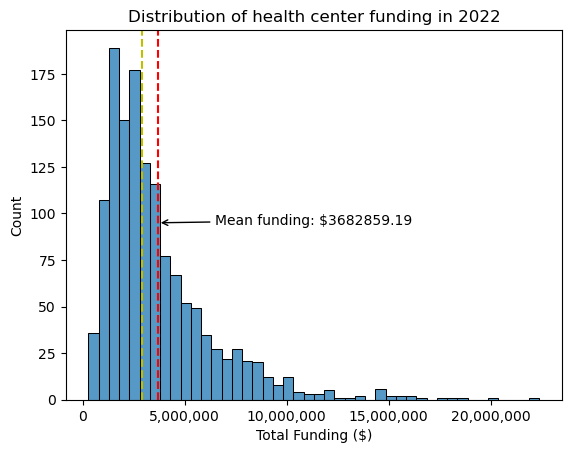

In [8]:
# plot ahealth center funding histogram
fig, ax = plt.subplots()
sns.histplot(x='total_hc_funding', data=health_centers)
plt.title('Distribution of health center funding in 2022')
plt.xlabel('Total Funding ($)')

mean_funding = health_centers['total_hc_funding'].mean()
plt.axvline(mean_funding, linestyle='--', color='r', label=f'Mean funding: ${mean_funding:.2f}')

# Adding text and arrow annotation
plt.annotate('Mean funding: ${:.2f}'.format(mean_funding),
             xy=(mean_funding, 95),
             xycoords='data',
             xytext=(6500000, 100),
             textcoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'),
             horizontalalignment='left',
             verticalalignment='top')

plt.axvline(health_centers['total_hc_funding'].median(), linestyle='--', color='y', label=f'Median funding: ${mean_funding:.2f}')

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 


In [9]:
health_centers[['total_hc_funding']].describe().apply(lambda x: x.apply('{0:.2f}'.format))

total_hc_funding
count          1368.00
mean        3682859.19
std         2743691.61
min          275778.00
25%         1807346.75
50%         2882753.50
75%         4611892.25
max        22382349.00

Health center funding is heavily right skewed. Most health centers between 1.8M and 4.6M of health center funding annually, with the mean funding level just over 3.6 million. 

There are several outliers that get more than 10,000,000 and some as high as 22,000,000 in total health center funding each year. 

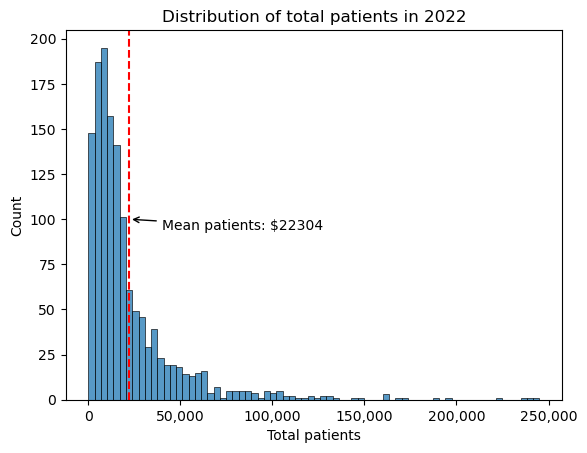

In [10]:
# plot distribution of patients served
fig, ax = plt.subplots()
sns.histplot(x='total_patients', data=health_centers)
plt.title('Distribution of total patients in 2022')
plt.xlabel('Total patients')

mean_patients = health_centers['total_patients'].mean()
plt.axvline(mean_patients, linestyle='--', color='r', label=f'Mean patients served: {mean_patients:.0f}')

# Adding text and arrow annotation
plt.annotate('Mean patients: ${:.0f}'.format(mean_patients),
             xy=(mean_patients, 100),
             xycoords='data',
             xytext=(40000, 100),
             textcoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'),
             horizontalalignment='left',
             verticalalignment='top')


ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 

The total patients served is also heavily skewed to the right. Most health centers serve less than 20,000 patients per year with the mean being just over 22,000 patients per year. 

There are many outliers for this feature as well, with some as high as 100,000 patients per year and the max being just under 250,000 per year. 

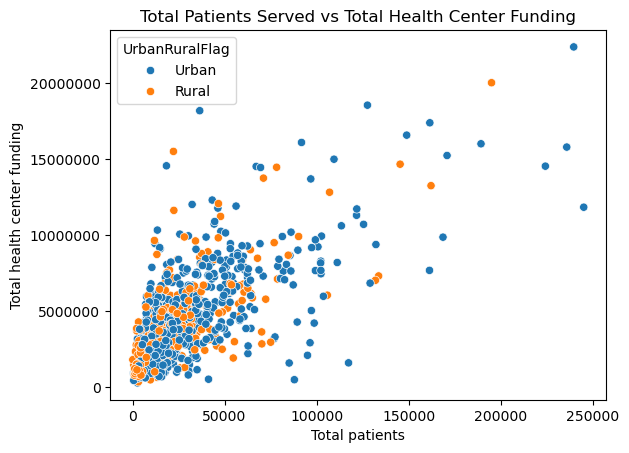

In [11]:
# scatter plot of health center funding vs total patients served
fix, ax = plt.subplots()

sns.scatterplot(x='total_patients', y='total_hc_funding', data=health_centers, hue='UrbanRuralFlag')
plt.title('Total Patients Served vs Total Health Center Funding')
plt.xlabel('Total patients')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')

There is definitely a strong, positive correlation between funding received and patients served, however there are alo many outliers.  

There isn't an immediate relationship between urban vs rural health centers and funding. It is suprising to see that there are a few rural providers that serve significantly more patients than some urban providers. Additionally, we can see the outliers as far as those who serve an average number of patients but receive nearly twice as much funding as entities serving the same number of patients. I'll want to investigate this further with other features like other funding sources, social determinants of health in their patient populations, high need, and operational details. 

I want to take a look at the 10 health centers that receive the most funding. I want to compare this list to the top 10 health centers by patients served. 

In [12]:
top_funded = health_centers[['BHCMISID', 'HealthCenterName', 'HealthCenterCity', 'HealthCenterState','total_hc_funding', 'total_patients']]\
                    .sort_values('total_hc_funding', ascending=False).head(10)

top_funded['rank'] = range(1, len(top_funded) + 1)

In [13]:
top_patients = health_centers[['BHCMISID', 'HealthCenterName', 'HealthCenterCity', 'HealthCenterState', 'total_hc_funding', 'total_patients']]\
                    .sort_values('total_patients', ascending=False).head(10)

top_patients['rank'] = range(1, len(top_patients) + 1)

In [14]:
# top funded states
top_funded['HealthCenterState'].value_counts()

HealthCenterState
CA    3
NY    2
WA    1
MN    1
IL    1
CO    1
AL    1
Name: count, dtype: int64

In [15]:
# states with most patients served
top_patients['HealthCenterState'].value_counts()

HealthCenterState
CA    4
WA    2
NY    1
CO    1
IL    1
FL    1
Name: count, dtype: int64

It is interesting that states that have the most funding across entities in the top 10 are not necessarily the states that serve the most patients. We see that Alabama is one of the states with the most funding due to one organization, but is not in the top 10 for patients served. I want to take a look at these organizations more closely.

In [16]:
top_funded_vs_patients = top_funded.merge(top_patients, on='rank', suffixes=('_F', '_P'))
top_funded_vs_patients[['rank', 'HealthCenterName_F', 'HealthCenterName_P']]

rank                                 HealthCenterName_F  \
0     1                     HUDSON RIVER HEALTH CARE, INC.   
1     2                   YAKIMA VALLEY FARMWORKERS CLINIC   
2     3                               CLINICA SIERRA VISTA   
3     4  WEST SIDE COMMUNITY HEALTH SERVICES, INC. DBA ...   
4     5           FAMILY HEALTH CENTERS OF SAN DIEGO, INC.   
5     6                    SUNSET PARK HEALTH COUNCIL, INC   
6     7                                    SIHF HEALTHCARE   
7     8                 DENVER HEALTH & HOSPITAL AUTHORITY   
8     9                          FAMILY HEALTHCARE NETWORK   
9    10              QUALITY OF LIFE HEALTH SERVICES, INC.   

                              HealthCenterName_P  
0           ALTA MED HEALTH SERVICES CORPORATION  
1                 HUDSON RIVER HEALTH CARE, INC.  
2                      FAMILY HEALTHCARE NETWORK  
3                SEA-MAR COMMUNITY HEALTH CENTER  
4               YAKIMA VALLEY FARMWORKERS CLINIC  
5             DENVER HEALTH & HOSPITAL AUTHORITY  
6                ACCESS COMMUNITY HEALTH NETWORK  
7                               MCR HEALTH, INC.  
8  UNITED HLTH CNTRS OF SAN JOAQUIN VALLEY, INC.  
9       FAMILY HEALTH CENTERS OF SAN DIEGO, INC.

In [17]:
# calculate differences in funding and patients served between top funded and top patients
top_funded_vs_patients['funding_difference'] = top_funded_vs_patients['total_hc_funding_F'] - top_funded_vs_patients['total_hc_funding_P']
top_funded_vs_patients['patient_difference'] = top_funded_vs_patients['total_patients_F'] - top_funded_vs_patients['total_patients_P']
top_funded_vs_patients[['HealthCenterName_F', 'HealthCenterName_P', 'rank', 'funding_difference', 'patient_difference']]

HealthCenterName_F  \
0                     HUDSON RIVER HEALTH CARE, INC.   
1                   YAKIMA VALLEY FARMWORKERS CLINIC   
2                               CLINICA SIERRA VISTA   
3  WEST SIDE COMMUNITY HEALTH SERVICES, INC. DBA ...   
4           FAMILY HEALTH CENTERS OF SAN DIEGO, INC.   
5                    SUNSET PARK HEALTH COUNCIL, INC   
6                                    SIHF HEALTHCARE   
7                 DENVER HEALTH & HOSPITAL AUTHORITY   
8                          FAMILY HEALTHCARE NETWORK   
9              QUALITY OF LIFE HEALTH SERVICES, INC.   

                              HealthCenterName_P  rank  funding_difference  \
0           ALTA MED HEALTH SERVICES CORPORATION     1            10545167   
1                 HUDSON RIVER HEALTH CARE, INC.     2            -2355213   
2                      FAMILY HEALTHCARE NETWORK     3             2757398   
3                SEA-MAR COMMUNITY HEALTH CENTER     4             3649396   
4               YAKIMA VALLEY FARMWORKERS CLINIC     5            -2635820   
5             DENVER HEALTH & HOSPITAL AUTHORITY     6              569253   
6                ACCESS COMMUNITY HEALTH NETWORK     7              858362   
7                               MCR HEALTH, INC.     8             6143340   
8  UNITED HLTH CNTRS OF SAN JOAQUIN VALLEY, INC.     9             2538602   
9       FAMILY HEALTH CENTERS OF SAN DIEGO, INC.    10            -1883576   

   patient_difference  
0               -5438  
1              -44627  
2             -108224  
3             -187700  
4              -33511  
5              -40352  
6              -79031  
7               20640  
8               73702  
9             -139224

Although there is some overlap, health centers that serve more patients don't necessarily receive more health center grant funding. For example, Alta Med Health Services Corporation is the top patient serving health center and serves 5,438 more patients a year than the Hudson River Health Care, Inc, the entity that receives the most health center funding. Hudson River receives 10.5 million more per year than Alta Med. Additionally, Alta Med is actually not even in the top 10 funded health centers, despite serving the most patients. Similarly, Sea-Mar Community Health Center is the fourth largest health center in terms of patients served and is not in the top 10 most funded health centers. 

In [18]:
# count urban and rural providers
urb_rur = health_centers['UrbanRuralFlag'].value_counts().reset_index()
urb_rur['perc'] = round(urb_rur['count'] / urb_rur['count'].sum() * 100, 2)
urb_rur

UrbanRuralFlag  count   perc
0          Urban    804  58.77
1          Rural    564  41.23

In [19]:
funding_grouping = health_centers.groupby('UrbanRuralFlag')['total_hc_funding'].sum().reset_index()
funding_grouping['perc_of_total_funding'] = round((funding_grouping['total_hc_funding'] / funding_grouping['total_hc_funding'].sum()) * 100, 2)
funding_grouping

UrbanRuralFlag  total_hc_funding  perc_of_total_funding
0          Rural        1806649284                  35.86
1          Urban        3231502088                  64.14

Most entities are urban providers, however, there is still a significant number of rural providers. Although urban providers only represent 58.7% of the total number of entities, they receive 64.1% of the total available health center funding. Rural providers represent 41.3% of the total number of providers and receive 35.9% of the funding. 

## Funding Streams 

Below is an analyis of non-patient revenue streams, including grant funding (federal, state, local government, private funders) and other revenue.

In [20]:
health_centers[['total_hc_funding',
       'bphc_total', 'total_other_federal_grants', 'total_state_grants', 'total_local_gov_grants',
       'total_private_grants', 'total_other_revenue', 'total_revenue']].describe().apply(lambda x: x.apply('{0:.2f}'.format)).T

count         mean          std        min  \
total_hc_funding            1368.00   3682859.19   2743691.61  275778.00   
bphc_total                  1368.00   6089411.31   5086895.69  358149.00   
total_other_federal_grants  1368.00    436877.17   1276994.78       0.00   
total_state_grants          1368.00    763249.16   1612012.67       0.00   
total_local_gov_grants      1368.00    664946.28   2405281.46       0.00   
total_private_grants        1368.00    790851.80   1618139.18       0.00   
total_other_revenue         1368.00   1087083.31  11678296.80       0.00   
total_revenue               1368.00  10514231.92  17039394.56  828062.00   

                                   25%         50%          75%           max  
total_hc_funding            1807346.75  2882753.50   4611892.25   22382349.00  
bphc_total                  2978146.00  4559299.50   7329947.75   48065368.00  
total_other_federal_grants        0.00        0.00    242494.25   13597206.00  
total_state_grants                0.00   177752.50    758176.75   19982632.00  
total_local_gov_grants            0.00        0.00    300119.50   48056004.00  
total_private_grants          15000.00   212815.50    861540.50   22007477.00  
total_other_revenue           14817.00   135399.00    546537.25  415573508.00  
total_revenue               4140434.00  6677856.00  12404183.75  485335878.00

Most organizations do not receive other federal grants or local government grants. Many do receive state and private funding as well as other revenue.

Some organizations also have significantly larger operations, as can be seen by the maximum values for total other revenue 415,573,508.00 and total revenue 485,335,878.00 compared to the medians for these measures, 134,991.50 and 6,656,907.00 respectively. It may be worth grouping entities by their opeartional sizes given revenue and patient populations. 

I'm interested to know the total health center funding as a proportion of total non-patient revenue. I also want to see the health center funding as a proportion of total grant funding.

After gathering some new summary data, I will drop the detailed breakdown of grant funding type to reduce the number of columns. I will preserve information about health center funding, other revenue, and total revenue. Before dropping columns, I will look at pairplots for these values.

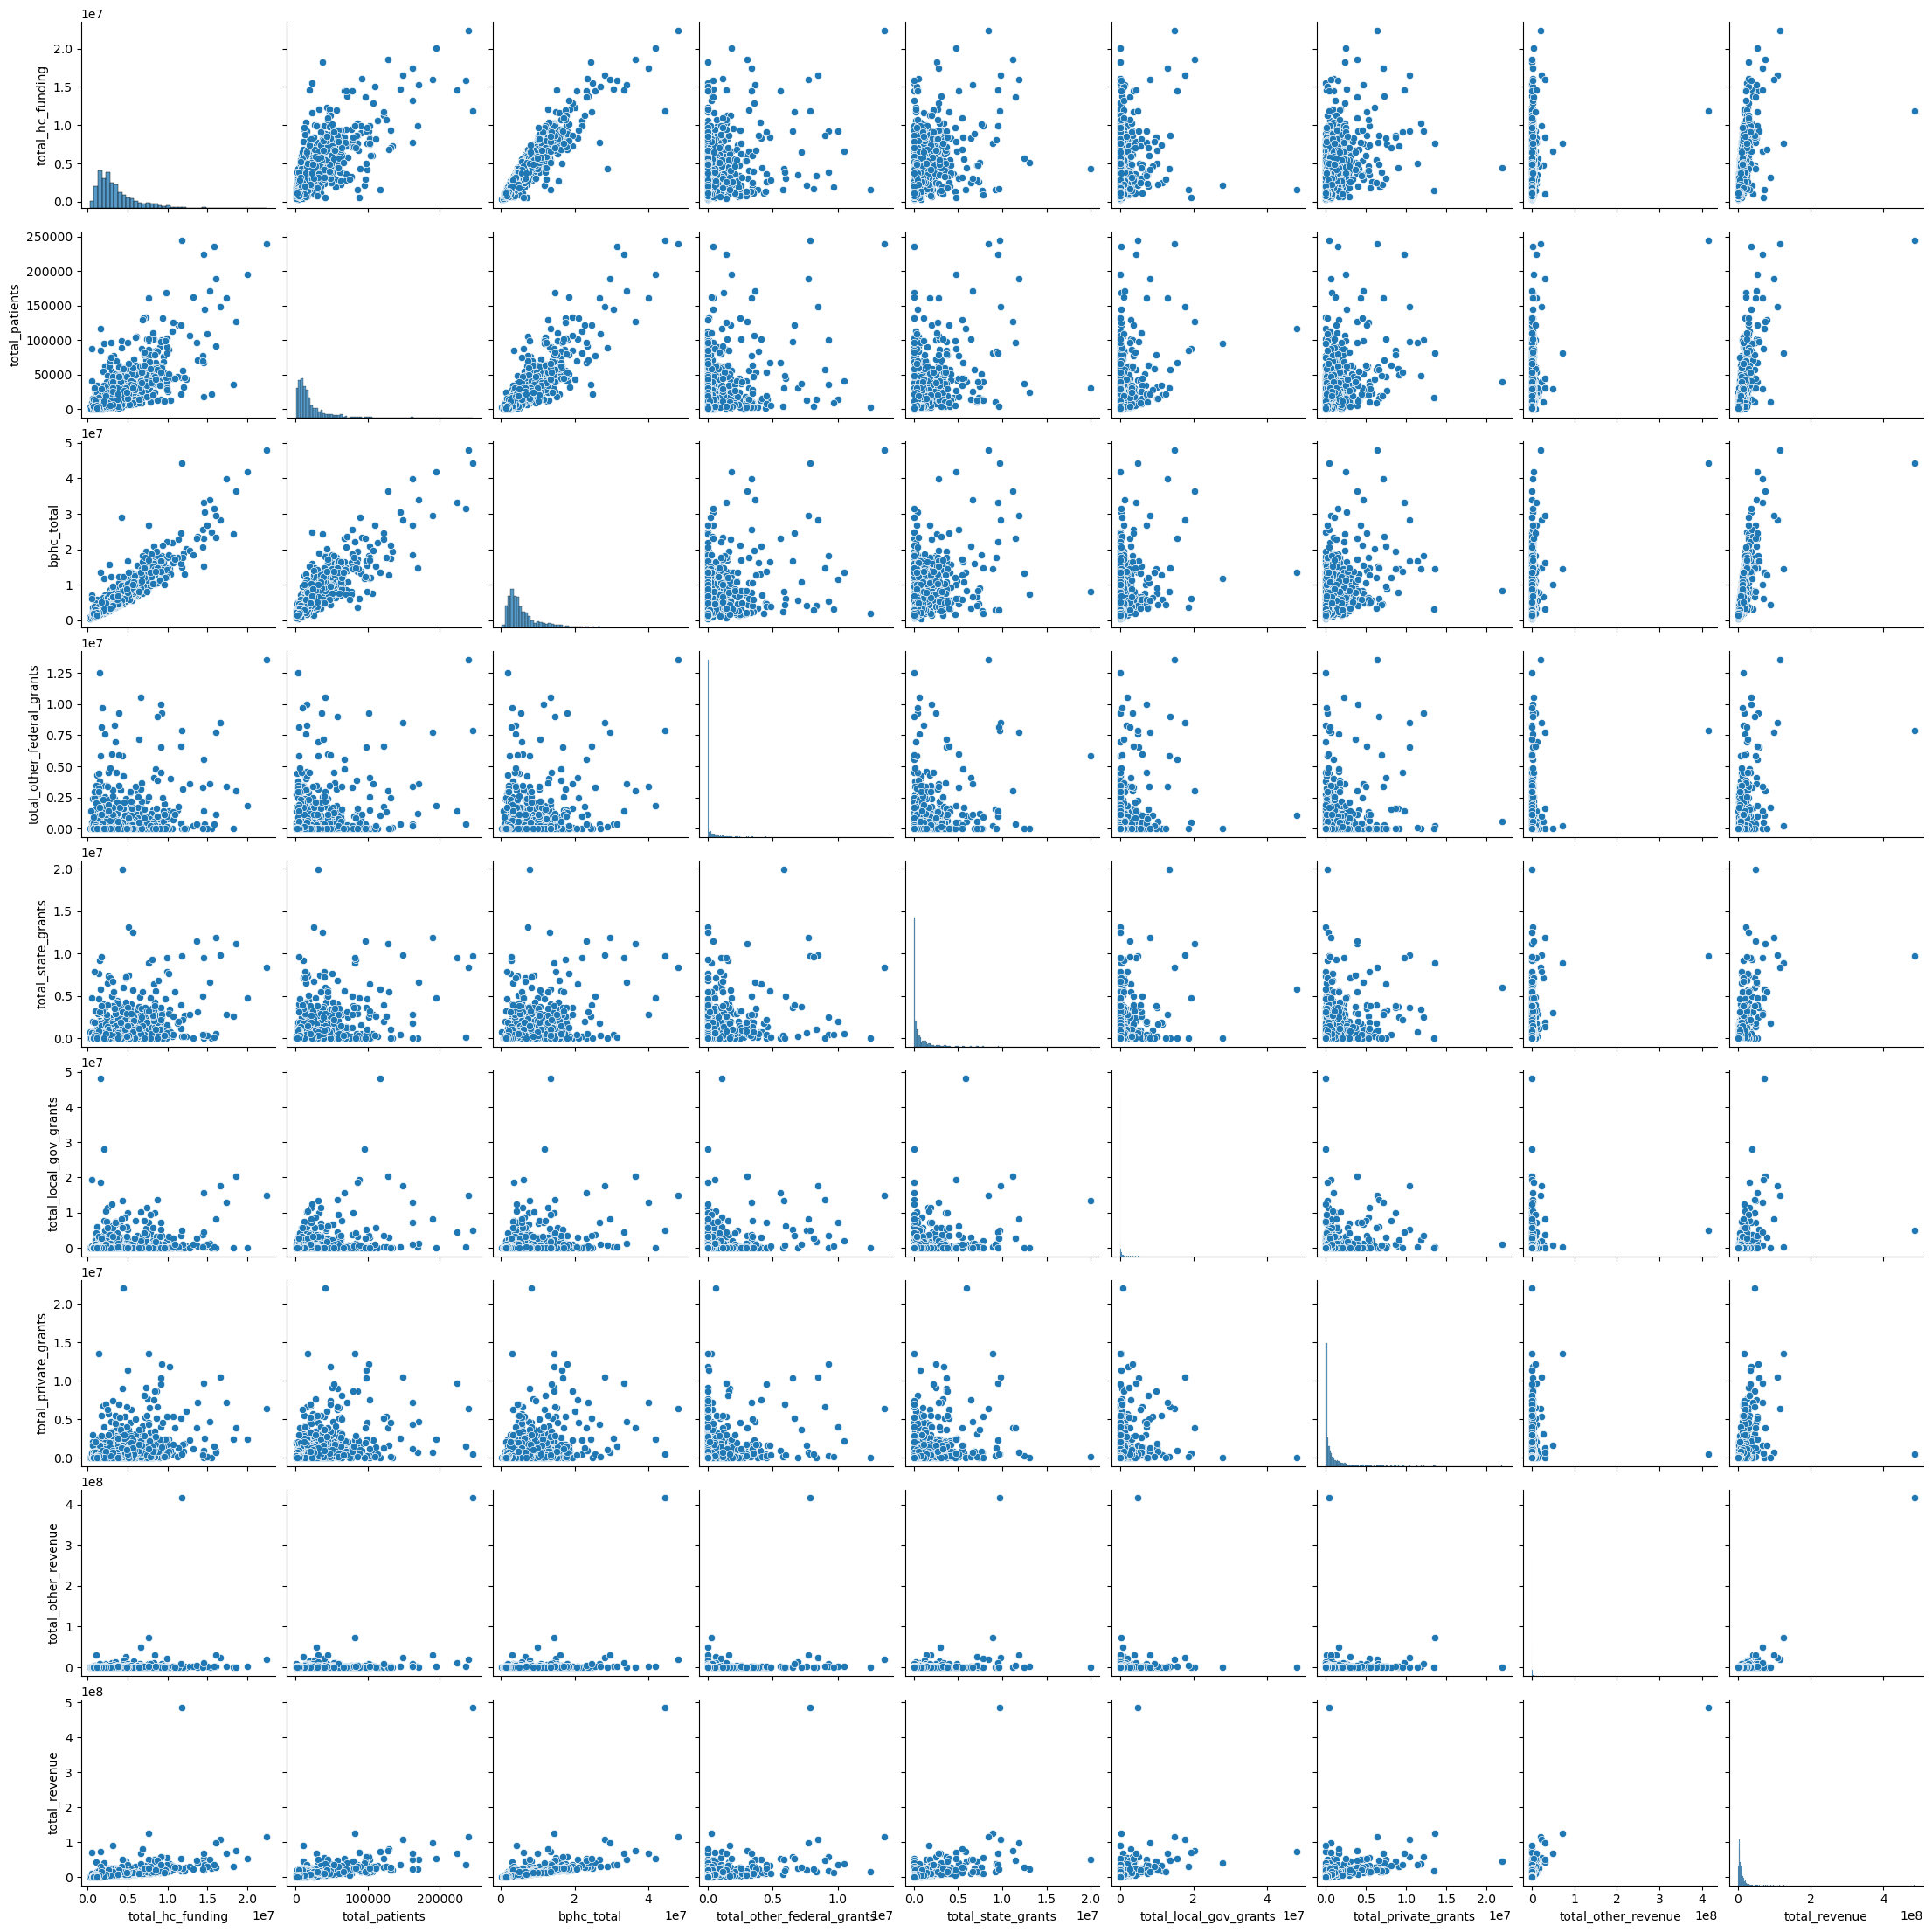

In [21]:
non_patient_funding = health_centers[['total_hc_funding', 'total_patients',
       'bphc_total', 'total_other_federal_grants', 'total_state_grants', 'total_local_gov_grants',
       'total_private_grants', 'total_other_revenue', 'total_revenue']]

sns.pairplot(non_patient_funding)

There are clearly a few outliers in terms of funding that seem to have significantly more other revenue, total revenue, and other grants compared to the vast majority of providers. 

There are some overall positive trends between total revenue and total health center funding. Additionally, there is strong correlation between health center funding and bphc funding, however this is not surprising at health center funding is a type of bphc funding organizations could have. 

I want to look at funding proportions to see the size of the role health center funding plays in these organization's operations. Does health center funding make up most of the total non-patient revenue? Are other funding streams more significant?

In [22]:
# calculate health center funding as a proportion of total revenue
health_centers['hc_grant_revenue_ratio'] = health_centers['total_hc_funding'] / health_centers['total_revenue']

health_centers['bphc_funding'] = health_centers['bphc_total'] - health_centers['total_hc_funding']

# calculate health center funding as a proportion of all grant funding
cols_to_sum = ['bphc_funding', 'total_other_federal_grants', 'total_state_grants', 'total_local_gov_grants', 'total_private_grants']
health_centers['total_grant_funding'] = health_centers[cols_to_sum].sum(axis=1)

# calculate total grant funding as a proportion of total revenue
health_centers['grants_to_rev_ratio'] = health_centers['total_grant_funding'] / health_centers['total_revenue']


In [23]:
# keep track of columns that need to be removed from clean dataset at the end
data_leakage_cols = []

In [24]:
# cols to remove after EDA
data_leakage_cols.append('hc_grant_revenue_ratio') # contains information about the target variable total_hc_funding
data_leakage_cols.append('bphc_total') # contains information about the target variable total_hc_funding

In [25]:
# display information about ratios
health_centers[['hc_grant_revenue_ratio', 'grants_to_rev_ratio', 'total_grant_funding']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

hc_grant_revenue_ratio grants_to_rev_ratio total_grant_funding
count             1368.00000          1368.00000          1368.00000
mean                 0.45194             0.45366       5062476.53143
std                  0.18049             0.17164       6617482.95431
min                  0.00689             0.00000             0.00000
25%                  0.31975             0.34227       1495029.00000
50%                  0.45068             0.44908       2932931.00000
75%                  0.58148             0.56944       6122874.50000
max                  1.00000             0.93105      68907915.00000

In [26]:
# identify health centers that receive no other grant funding
zero_grant_funding = health_centers[health_centers['total_grant_funding'] == 0]
print(f"Number of entries with zero total grant funding: {len(zero_grant_funding)}")
print(zero_grant_funding[['HealthCenterName', 'bphc_funding', 'total_other_federal_grants', 'total_state_grants', 'total_local_gov_grants', 'total_private_grants']].head())

Number of entries with zero total grant funding: 2
                                   HealthCenterName  bphc_funding  \
1086  SANTA CLARA VALLEY HEALTH AND HOSPITAL SYSTEM             0   
1229            BENEVOLENCE INDUSTRIES INCORPORATED             0   

      total_other_federal_grants  total_state_grants  total_local_gov_grants  \
1086                           0                   0                       0   
1229                           0                   0                       0   

      total_private_grants  
1086                     0  
1229                     0  


Santa Clara Valley Health and Hospital System and Benevolence Industries Incorporated are the only two health care providers who don't receive any other grant funding outside of the health center funding.

I won't need the individual grant type columns for further analysis or modeling as these would be redundant. I'll drop them below.

In [27]:
# drop detailed grant type columns
health_centers.drop(columns=cols_to_sum, inplace=True)

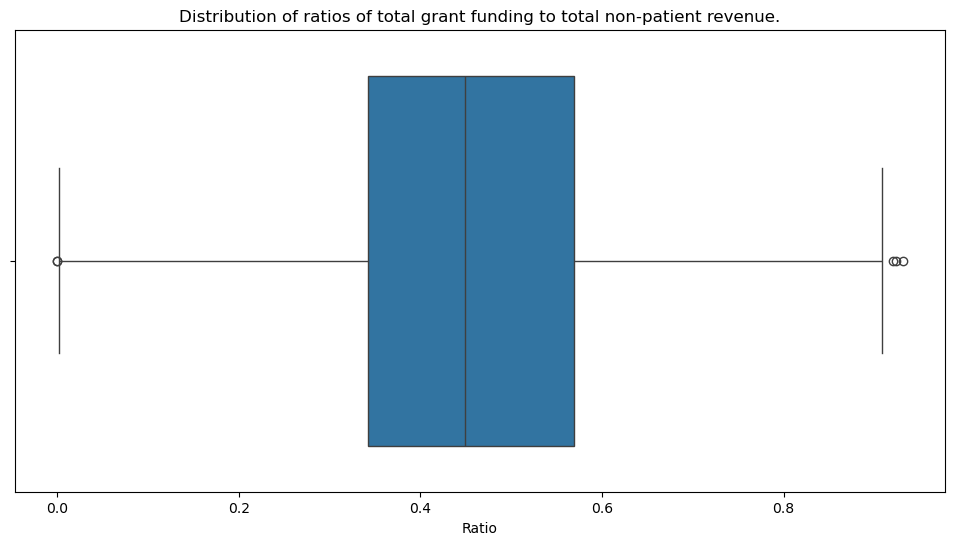

In [28]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title('Distribution of ratios of total grant funding to total non-patient revenue.')
sns.boxplot(x='grants_to_rev_ratio', data=health_centers)
plt.xlabel('Ratio');

For the majority of health centers, grant funding (exluding health center funding) makes up between 34% to 57% of their total non-patient revenue. 

Other revenue includes revenue that is unrelated to charge- based services or to grants. This includes things like fundraising, interest revenue, rent from tenants, patient health records fees, individual monetary donations, receipts from vending machines, retail pharmacy sales to the public (i.e., non–health center patients), and gains on the sale of an asset.

Text(0.5, 0, 'Ratio')

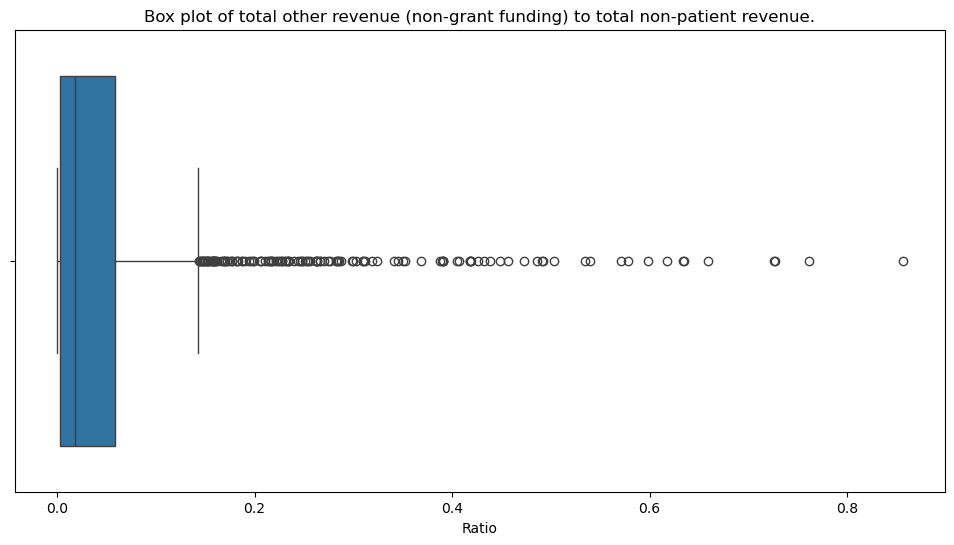

In [29]:
# calculate total other revenue  as a proportion of total revenue
health_centers['other_to_rev_ratio'] = health_centers['total_other_revenue'] / health_centers['total_revenue']

fig, ax = plt.subplots(figsize=(12,6))

plt.title('Box plot of total other revenue (non-grant funding) to total non-patient revenue.')
sns.boxplot(x='other_to_rev_ratio', data=health_centers)

plt.xlabel('Ratio')

There are several outlier agencies where other revenue makes up the majority of their non-patient revenue, with some over 60% of their total revenue coming from sources other than grants. 

In [30]:
health_centers[['HealthCenterName', 'total_other_revenue', 'total_grant_funding', 'total_patients']].sort_values('total_other_revenue', ascending=False).head(20)

HealthCenterName  total_other_revenue  \
1143           ALTA MED HEALTH SERVICES CORPORATION            415573508   
23           EAST BOSTON NEIGHBORHOOD HEALTH CENTER             71967719   
8                            HARBOR HEALTH SERVICES             49539088   
352                  PIEDMONT HEALTH SERVICES, INC.             30738920   
316                           PHILADELPHIA, CITY OF             30576676   
985              DENVER HEALTH & HOSPITAL AUTHORITY             29785969   
33        BOSTON HEALTH CARE FOR THE HOMELESS, INC.             26609467   
151                 SUNSET PARK HEALTH COUNCIL, INC             22912139   
145              COMMUNITY HEALTHCARE NETWORK, INC.             21321355   
141                  HUDSON RIVER HEALTH CARE, INC.             19870205   
407                   CAROLINA HEALTH CENTERS, INC.             16845220   
0                       HOLYOKE HEALTH CENTER, INC.             14258919   
813              STIGLER HEALTH AND WELLNESS CENTER             11973859   
664                LAWNDALE CHRISTIAN HEALTH CENTER             10702594   
1283                SEA-MAR COMMUNITY HEALTH CENTER             10045410   
271   THREE LOWER COUNTIES COMMUNITY SERVICES, INC.              9902838   
570                BALDWIN FAMILY HEALTH CARE, INC.              9384678   
71                     RICHFORD HEALTH CENTER, INC.              9174828   
832          LEGACY COMMUNITY HEALTH SERVICES, INC.              9160662   
163                 THE INSTITUTE FOR FAMILY HEALTH              8814641   

      total_grant_funding  total_patients  
1143             55395011          245012  
23               29989791           81886  
8                 8614723           29114  
352              10562379           44655  
316               9478462           30555  
985              42027209          189225  
33               13624587           10174  
151              57990849          148873  
145              21277210           39938  
141              68907915          239574  
407               4873927           25770  
0                 6112612           19144  
813               9325731           30571  
664              13120900           53331  
1283             43827188          224180  
271               5460698           55318  
570               4703120           23217  
71                2420053           17781  
832              32943353          161254  
163              36193786          100697

**Does other revenue streams impact health center funding?**

Alta Med is a clear outlier, brining in nearly 6x more other revenue compared to the health center that brings in the 2nd most other revenue, East Boston Neighborhood Health Center. This could explain why their health center funding is so low compared to similarly other large health centers. 

I'll investigate this more closely by splitting up the health centers into two groups: 
1. high other revenue: health center's other revenue is beyond the 50th percentile
2. low other revenue: health center's other revenue is below the 50th percentile

Below I will investigate the two groups' distributions with boxplots. I will then perform a statistical test to analyze results.

**Null hypothesis:** There is no difference in health center funding between agencies with high and low other revenue sources. 

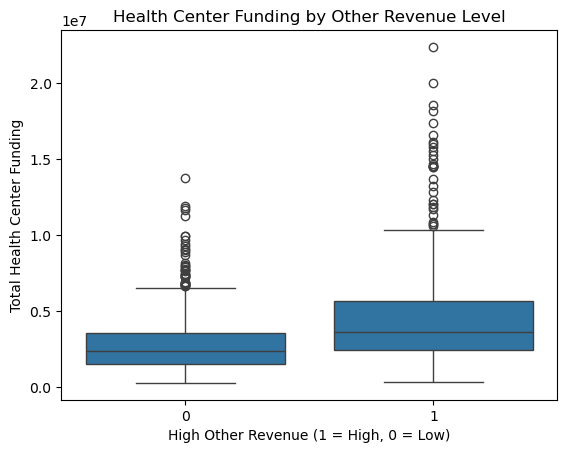

In [31]:
# Calculate the median or another quantile as the threshold
threshold = health_centers['total_other_revenue'].median()

# Create a binary variable based on this threshold
health_centers['high_other_revenue'] = (health_centers['total_other_revenue'] > threshold).astype(int)

sns.boxplot(x='high_other_revenue', y='total_hc_funding', data=health_centers)
plt.title('Health Center Funding by Other Revenue Level')
plt.xlabel('High Other Revenue (1 = High, 0 = Low)')
plt.ylabel('Total Health Center Funding')
plt.show()

Health centers with high other revenue seem to be more likely to have higher amounts of health center funding. This could be due to having larger operations.

In [32]:
from scipy.stats import mannwhitneyu, ttest_ind, levene

# Test for equal variances
stat, p_val_levene = levene(health_centers[health_centers['high_other_revenue'] == 1]['total_hc_funding'],
                            health_centers[health_centers['high_other_revenue'] == 0]['total_hc_funding'])

print(f"Levene's Test p-value: {p_val_levene}")

# Depending on the outcome of Levene’s test, decide on the t-test's equality of variances parameter
equal_var = p_val_levene > 0.05

# Perform a t-test or Mann-Whitney U test
if health_centers['total_hc_funding'].skew() < 2 and health_centers['total_hc_funding'].kurtosis() < 7:
    stat, p_val = ttest_ind(health_centers[health_centers['high_other_revenue'] == 1]['total_hc_funding'],
                            health_centers[health_centers['high_other_revenue'] == 0]['total_hc_funding'],
                            equal_var=equal_var)
    print(f"T-test p-value: {p_val}")
else:
    stat, p_val = mannwhitneyu(health_centers[health_centers['high_other_revenue'] == 1]['total_hc_funding'],
                               health_centers[health_centers['high_other_revenue'] == 0]['total_hc_funding'])
    print(f"Mann-Whitney U Test p-value: {p_val}")


Levene's Test p-value: 2.067800966636783e-15
Mann-Whitney U Test p-value: 7.999314233652745e-35


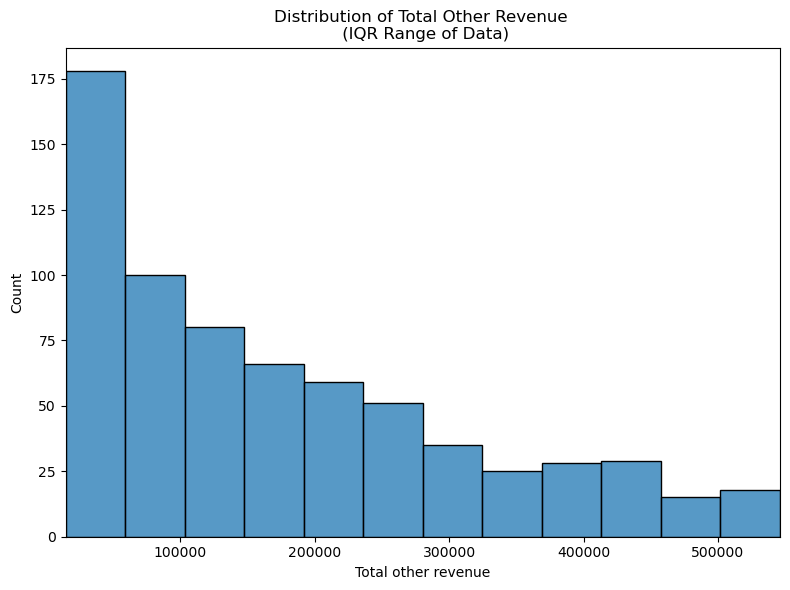

In [33]:
# distribution of total other revenue
other_rev = health_centers[(health_centers['total_other_revenue'] <= np.quantile(health_centers['total_other_revenue'], .75)) \
                           & (health_centers['total_other_revenue'] >= np.quantile(health_centers['total_other_revenue'], .25))]

fig, ax = plt.subplots(figsize=(8,6))

# Plotting low other revenue data
sns.histplot(other_rev['total_other_revenue'], ax=ax)
ax.set_xlim(left=other_rev['total_other_revenue'].min(), right=other_rev['total_other_revenue'].max())
ax.ticklabel_format(style='plain', axis='both')
ax.set_title('Distribution of Total Other Revenue \n (IQR Range of Data)')
ax.set_xlabel('Total other revenue')

plt.tight_layout()
plt.show()


In [34]:
# Define bins
bin_edges = [0, 1, 100000, 1000000, 30000000, float('inf')]  # Use float('inf') for the upper edge

# labels
bin_labels = ['Zero', 'Less than 100K', '100K to 1M', '1M to 30M', 'Over 30M']

# create cat column
health_centers['other_revenue_category'] = pd.cut(health_centers['total_other_revenue'], bins=bin_edges, labels=bin_labels, right=False)

health_centers[['total_other_revenue', 'other_revenue_category']].head()

total_other_revenue other_revenue_category
0             14258919              1M to 30M
1                36578         Less than 100K
2               270649             100K to 1M
3              1753132              1M to 30M
4                    0                   Zero

In [35]:
health_centers[health_centers['total_other_revenue'] == 0][['HealthCenterName', 'total_hc_funding', 'other_revenue_category']]

HealthCenterName  total_hc_funding  \
4                    CITY OF SPRINGFIELD, MASSACHUSETTS           1842241   
5                      CITY OF MANCHESTER NEW HAMPSHIRE           1668013   
44                 MA LEAGUE OF COMUNITY HEALTH CENTERS           1807775   
60                      WOOD RIVER HEALTH SERVICES INC.           1600730   
74                          HEALTH ACCESS NETWORK, INC.           3327920   
...                                                 ...               ...   
1354  SHOSHONE-BANNOCK TRIBES OF THE FORT HALL RESER...            885348   
1355                                         ADAPT, INC           1958123   
1358               OREGON HEALTH AND SCIENCE UNIVERSITY           2079083   
1366          CHUUK STATE DEPARTMENT OF HEALTH SERVICES            792000   
1367                     KOSRAE COMMUNITY HEALTH CENTER           1134755   

     other_revenue_category  
4                      Zero  
5                      Zero  
44                     Zero  
60                     Zero  
74                     Zero  
...                     ...  
1354                   Zero  
1355                   Zero  
1358                   Zero  
1366                   Zero  
1367                   Zero  

[217 rows x 3 columns]

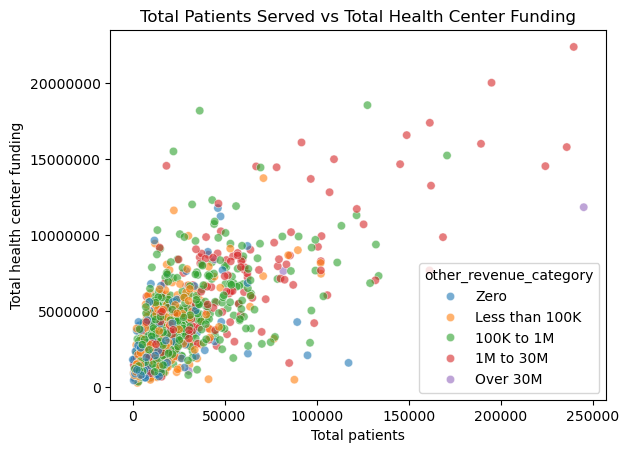

In [36]:
# scatter plot of health center funding vs total patients served
fix, ax = plt.subplots()

sns.scatterplot(x='total_patients', y='total_hc_funding', data=health_centers, hue='other_revenue_category', alpha=0.6)
plt.title('Total Patients Served vs Total Health Center Funding')
plt.xlabel('Total patients')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')

The larger health centers become, the more diversified their revenue streams appear. As some health centers increase in patient size, they seem to be more likely to have larger amounts of funding coming from other non-patient and non-grant revenue streams. However, we did see in the table earlier that this is not always the case. Some health centers that have massive amounts of total other revenue, like East Boston Neighborhood Health Center only serve a small number of patients, just over 80,000 in their case. 

Let's look at patient revenue and operations.

In [37]:
funding = health_centers[['total_patients', 
                'total_hc_funding',
                'total_charges', 
                'total_collected', 
                'total_sfs']]

In [38]:
funding.describe().apply(lambda x: x.apply('{0:.2f}'.format))

total_patients total_hc_funding total_charges total_collected  \
count        1368.00          1368.00        739.00          739.00   
mean        22304.23       3682859.19   28690351.44     18550262.25   
std         27282.48       2743691.61   48211315.68     32095626.70   
min           154.00        275778.00       7314.00            0.00   
25%          7057.50       1807346.75    6590144.00      4021280.50   
50%         13706.00       2882753.50   15203919.00      9502344.00   
75%         26154.25       4611892.25   31834424.50     21434937.00   
max        245012.00      22382349.00  672511973.00    525686359.00   

         total_sfs  
count       739.00  
mean    2432725.19  
std     5424696.00  
min           0.00  
25%      235336.50  
50%      813877.00  
75%     2267087.00  
max    64698474.00

I'm interested to look at the entity or entities that have 0 sliding fee scale discounts. Health centers are mandated to offer services on a sliding fee scale by law, so it is curious why there would be an entity that says 0 sfs discounts provided. 

In [39]:
no_sfs = health_centers[health_centers['total_sfs'] == 0][['HealthCenterName', 'total_hc_funding']]
print(no_sfs.shape)
no_sfs

(7, 2)


HealthCenterName  total_hc_funding
550   RECOVERY CONSULTANTS OF ATLANTA, INCORPORATED           1246352
750        LUTHERAN SOCIAL SERVICES OF CENTRAL OHIO           1369045
991             COLORADO COALITION FOR THE HOMELESS           9178083
1021       COMMUNITY ACTION OF LARAMIE COUNTY, INC.            438893
1152             MINISTRY OF HEALTH AND ENVIRONMENT            653252
1281                           MANILLAQ ASSOCIATION           2944978
1366      CHUUK STATE DEPARTMENT OF HEALTH SERVICES            792000

There are 7 organizations that did not report any sliding fee scale discount charges. I wanted to see if maybe this was because they are brand new entities. I looked up the first three organizations and they do say they offer sliding fee scales at their organizations. I am not sure why 0 would be lsited for these entities. 

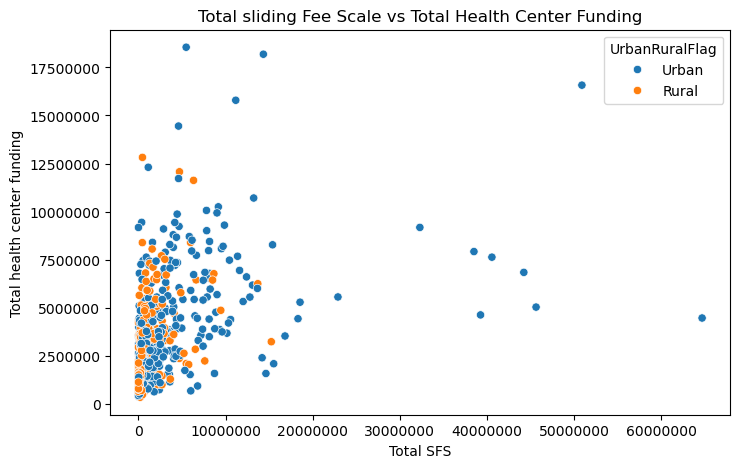

In [40]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(data=health_centers, x='total_sfs', y='total_hc_funding', hue='UrbanRuralFlag', ax=ax)
plt.title('Total sliding Fee Scale vs Total Health Center Funding')
plt.xlabel('Total SFS')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')

Urban entities seem to provide more sliding fee scale services compared to rural entities, even though some rural entities receive more health center funding compared to the urban entities. 

Let's look at charges vs collections

In [41]:
health_centers['collections_charges_ratio'] = health_centers['total_collected'] / health_centers['total_charges']

In [42]:
health_centers[['HealthCenterName', 'collections_charges_ratio']].sort_values('collections_charges_ratio', ascending=False).head(25)

HealthCenterName  \
1360                     N. A. T. I. V. E. PROJECT, THE   
1278                                  WHITE BIRD CLINIC   
1220                               GREENVILLE RANCHERIA   
1298           CLACKAMAS COUNTY HEALTH CENTERS DIVISION   
1063          COUNTY OF SACRAMENTO DOH & HUMAN SERVICES   
1346                                        LANE COUNTY   
1332                                     MOSAIC MEDICAL   
1292             VIRGINIA GARCIA MEMORIAL HEALTH CENTER   
1297                                        HEALTHPOINT   
1112                          KARUK TRIBE OF CALIFORNIA   
331                                   CITY OF FREDERICK   
1041         COMMUNITY HEALTH CARE CENTER, INCORPORATED   
579            FAMILY HEALTH CENTER OF MARSHFIELD, INC.   
1114                                   COUNTY OF SOLANO   
1300           LINCOLN COUNTY HEALTH AND HUMAN SERVICES   
260               KEYSTONE RURAL HEALTH CONSORTIA, INC.   
1339                                         OUTSIDE IN   
1201                          ACHIEVABLE FOUNDATION THE   
1323                       COWLITZ FAMILY HEALTH CENTER   
1151                            NEIGHBORHOOD HEALTHCARE   
1067                                  SANTA CRUZ COUNTY   
657   VALLEY PROFESSIONALS COMMUNITY HEALTH CENTER, ...   
952                              ALL CARE HEALTH CENTER   
150            BARCELONETA PRIMARY HEALTH SERVICES, INC   
1290                              YAKUTAT TLINGIT TRIBE   

      collections_charges_ratio  
1360                   2.862926  
1278                   2.635001  
1220                   2.075171  
1298                   1.681848  
1063                   1.623509  
1346                   1.607073  
1332                   1.548311  
1292                   1.510768  
1297                   1.486528  
1112                   1.485061  
331                    1.332890  
1041                   1.307309  
579                    1.290922  
1114                   1.277720  
1300                   1.268251  
260                    1.252436  
1339                   1.228966  
1201                   1.226378  
1323                   1.188100  
1151                   1.172606  
1067                   1.171129  
657                    1.169752  
952                    1.157401  
150                    1.148224  
1290                   1.137016

I'm not sure how to interpret the results of the collections to charges ratio. Health centers should not be collecting more per visit than what is charged. The overage may be due to collecting on charges made in a previous year. I will drop this new column due to insufficient understanding of the data.

In [43]:
health_centers.drop(columns=['collections_charges_ratio', 'total_collected','total_charges'], inplace=True)

## Social Determinants of Health 

I want to look how and if social determinant of health and funding is correlated. Health centers are supposed to increase access to care for vulnerable populations. Do entities that serve more vulnerable populations receive more funding? Which SDOH impact funding the most?

**Financial Insecurity**

First I will take a look at total number of people served at or below 100% Federal Poverty Level. Financial barriers to care is one of the most pressing challenges to address in access to care. I would think this heavily influences total health center funding. 

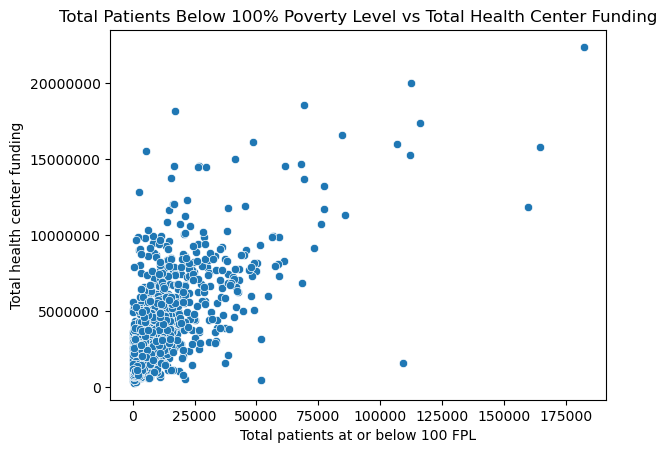

In [44]:
fix, ax = plt.subplots()

sns.scatterplot(x='fpl_100_below', y='total_hc_funding', data=health_centers)
plt.title('Total Patients Below 100% Poverty Level vs Total Health Center Funding')
plt.xlabel('Total patients at or below 100 FPL')
plt.ylabel('Total health center funding')
ax.ticklabel_format(style='plain', axis='both')

It apeears that the entity that receives the most health center funding also serves the greatest number of patients at or below 100% federally poverty level. They serve over 175,000 patiets with high financial barriers to care. 

Several other outlier entities also receive a lot of funding for high number of financially insecure individuals. However, there are also quite a few entities that receive high amount of funding and do not serve that many financial insecure patients by comparison.

I am going to use Plotly so I can make this scatter plot more interactive to see which intities they are. 

In [45]:
df = health_centers
fig = px.scatter(df, x='fpl_100_below', y='total_hc_funding', hover_data='HealthCenterName', 
                 size='total_patients', 
                 title = "Total patients at or below 100% FPL vs Health center funding", 
                 width=800, height=600)
fig.show()

We see that Hudson is the entity that provides the most in terms of care to people at or below 100% federal poverty level, serving 182.3K patients in 2022. 

**Racial and Ethnic Minorities**

Race and ethnicity are two other factors that largely influence individuals' access to care. This is largely due to historical and systemic racism in the United States. Although we will not be examining how this influences access to care at an individual level, I want to see if it does impact the funding levels for organizations. Specifically, do organizations that serve higher proportions of racial and ethnic diversity receive more funding?

We are going to need to aggregate the race columns into a new racial diversity column which will exclude white, hispanic any race and unreported. We are exclusing hispanic any race since this is an ethnicity. Also, patients represented as hispanic could also be counted as a race, so we don't want to double count them. 

Because some health centers serve a lot more patients that others, I will also want to calculate these as proportions for analysis. 

In [46]:
# identify columns to aggregate
race_cols_agg = ['asian', 'native_hawaiian', 'pac_isl', 'black', 'am_ind']

# sum up these results
health_centers['diverse_patients_sum'] = health_centers[race_cols_agg].sum(axis=1)

# calculate the proportion of total patients that are diverse
health_centers['diverse_race_proportion'] = health_centers['diverse_patients_sum'] / health_centers['total_patients']
health_centers['hispanic_proportion'] = health_centers['hispanic_any_race'] / health_centers['total_patients']

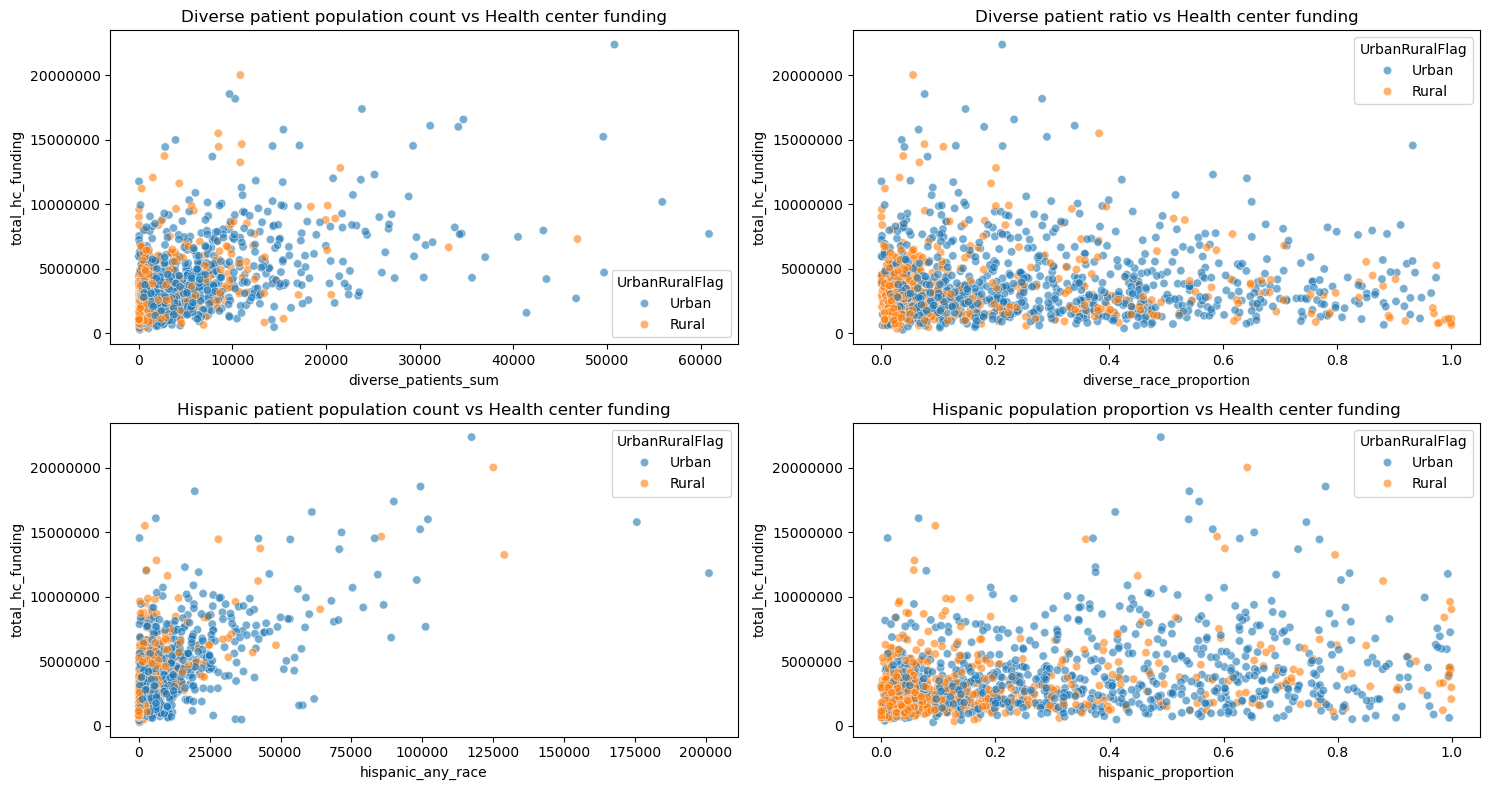

In [47]:
fit, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,8))

ax[0,0] = sns.scatterplot(x='diverse_patients_sum', y='total_hc_funding', data=health_centers, ax=ax[0,0], hue='UrbanRuralFlag', alpha=0.6)
ax[0,0].set_title('Diverse patient population count vs Health center funding')
ax[0,0].ticklabel_format(style='plain', axis='both')


ax[0,1] = sns.scatterplot(x='diverse_race_proportion', y='total_hc_funding', data=health_centers, ax=ax[0,1], hue='UrbanRuralFlag', alpha=0.6)
ax[0,1].set_title('Diverse patient ratio vs Health center funding')
ax[0,1].ticklabel_format(style='plain', axis='both')

ax[1,0] = sns.scatterplot(x='hispanic_any_race', y='total_hc_funding', data=health_centers, ax=ax[1,0], hue='UrbanRuralFlag', alpha=0.6)
ax[1,0].set_title('Hispanic patient population count vs Health center funding')
ax[1,0].ticklabel_format(style='plain', axis='both')

ax[1,1] = sns.scatterplot(x='hispanic_proportion', y='total_hc_funding', data=health_centers, ax=ax[1,1], hue='UrbanRuralFlag', alpha=0.6)
ax[1,1].set_title('Hispanic population proportion vs Health center funding')
ax[1,1].ticklabel_format(style='plain', axis='both')

plt.tight_layout()
plt.show()


There does not appear to be a strong relationship between either proportion of racially or ethnically diverse patients and total health center funding. However, there appears to be a positive correlation between the number of racially or ethnically diverse patients served and total health center funding. This shows that the number of patients served is more important than the proportion who are racially or ethnically diverse. 

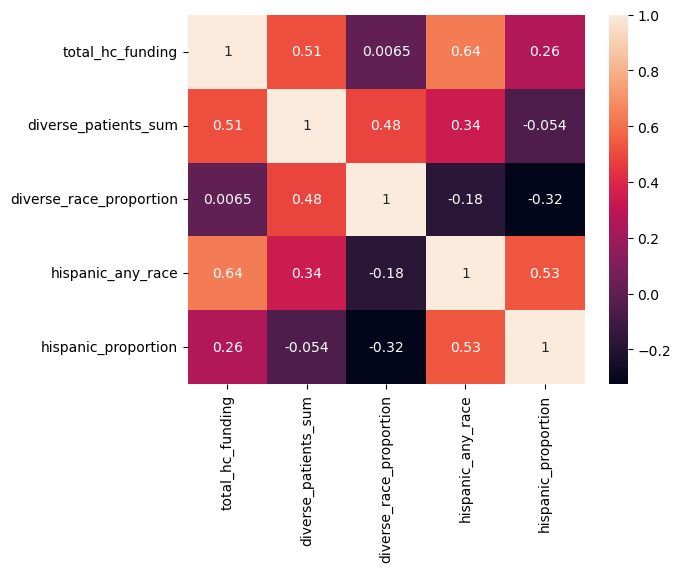

In [48]:
# Calculate correlation matrix
correlation_matrix = health_centers[['total_hc_funding', 'diverse_patients_sum', 'diverse_race_proportion', 'hispanic_any_race', 'hispanic_proportion']].corr()

# Display the correlation matrix
sns.heatmap(correlation_matrix, annot=True);


The correlation matrix confirms my ealier observations that the number of racially diverse patients and the number of hispanic patients are positively correlated with health center funding. Given that absolute numbers show a stronger relationship with funding, it may be more impactful to focus on increasing the total number of diverse and Hispanic patients served, particularly if funding allocation is a priority.

While proportions don’t show a strong direct relationship with funding, they are essential for understanding equity and representation within health services. They might not directly influence funding amount but are critical for policy-making, resource allocation, and community engagement strategies. The health center program aims to fund health care in areas with high need. 

It is interesting to see the negative correlation between hispanic proportion vs racially diverse populations. This could suggest that health centers are more focused on specific racial and ethnic groups. 

I'll drop the individual race columns. I will likely drop the proportion columns as well, but I want to look at a few more things first regarding the impact of proportions on health center funding. 

In [49]:
# drop columns
health_centers.drop(columns=(race_cols_agg), inplace=True)
health_centers.drop(columns=['white', 'unreported'], inplace=True)

Okay, I want to get a brief overview of any relationship the other social determinants of health may have to total health center funding. I will quickly visualize them as scatter plots. Several of these features may make more sense to aggregate, such as the various insurance groupings. 

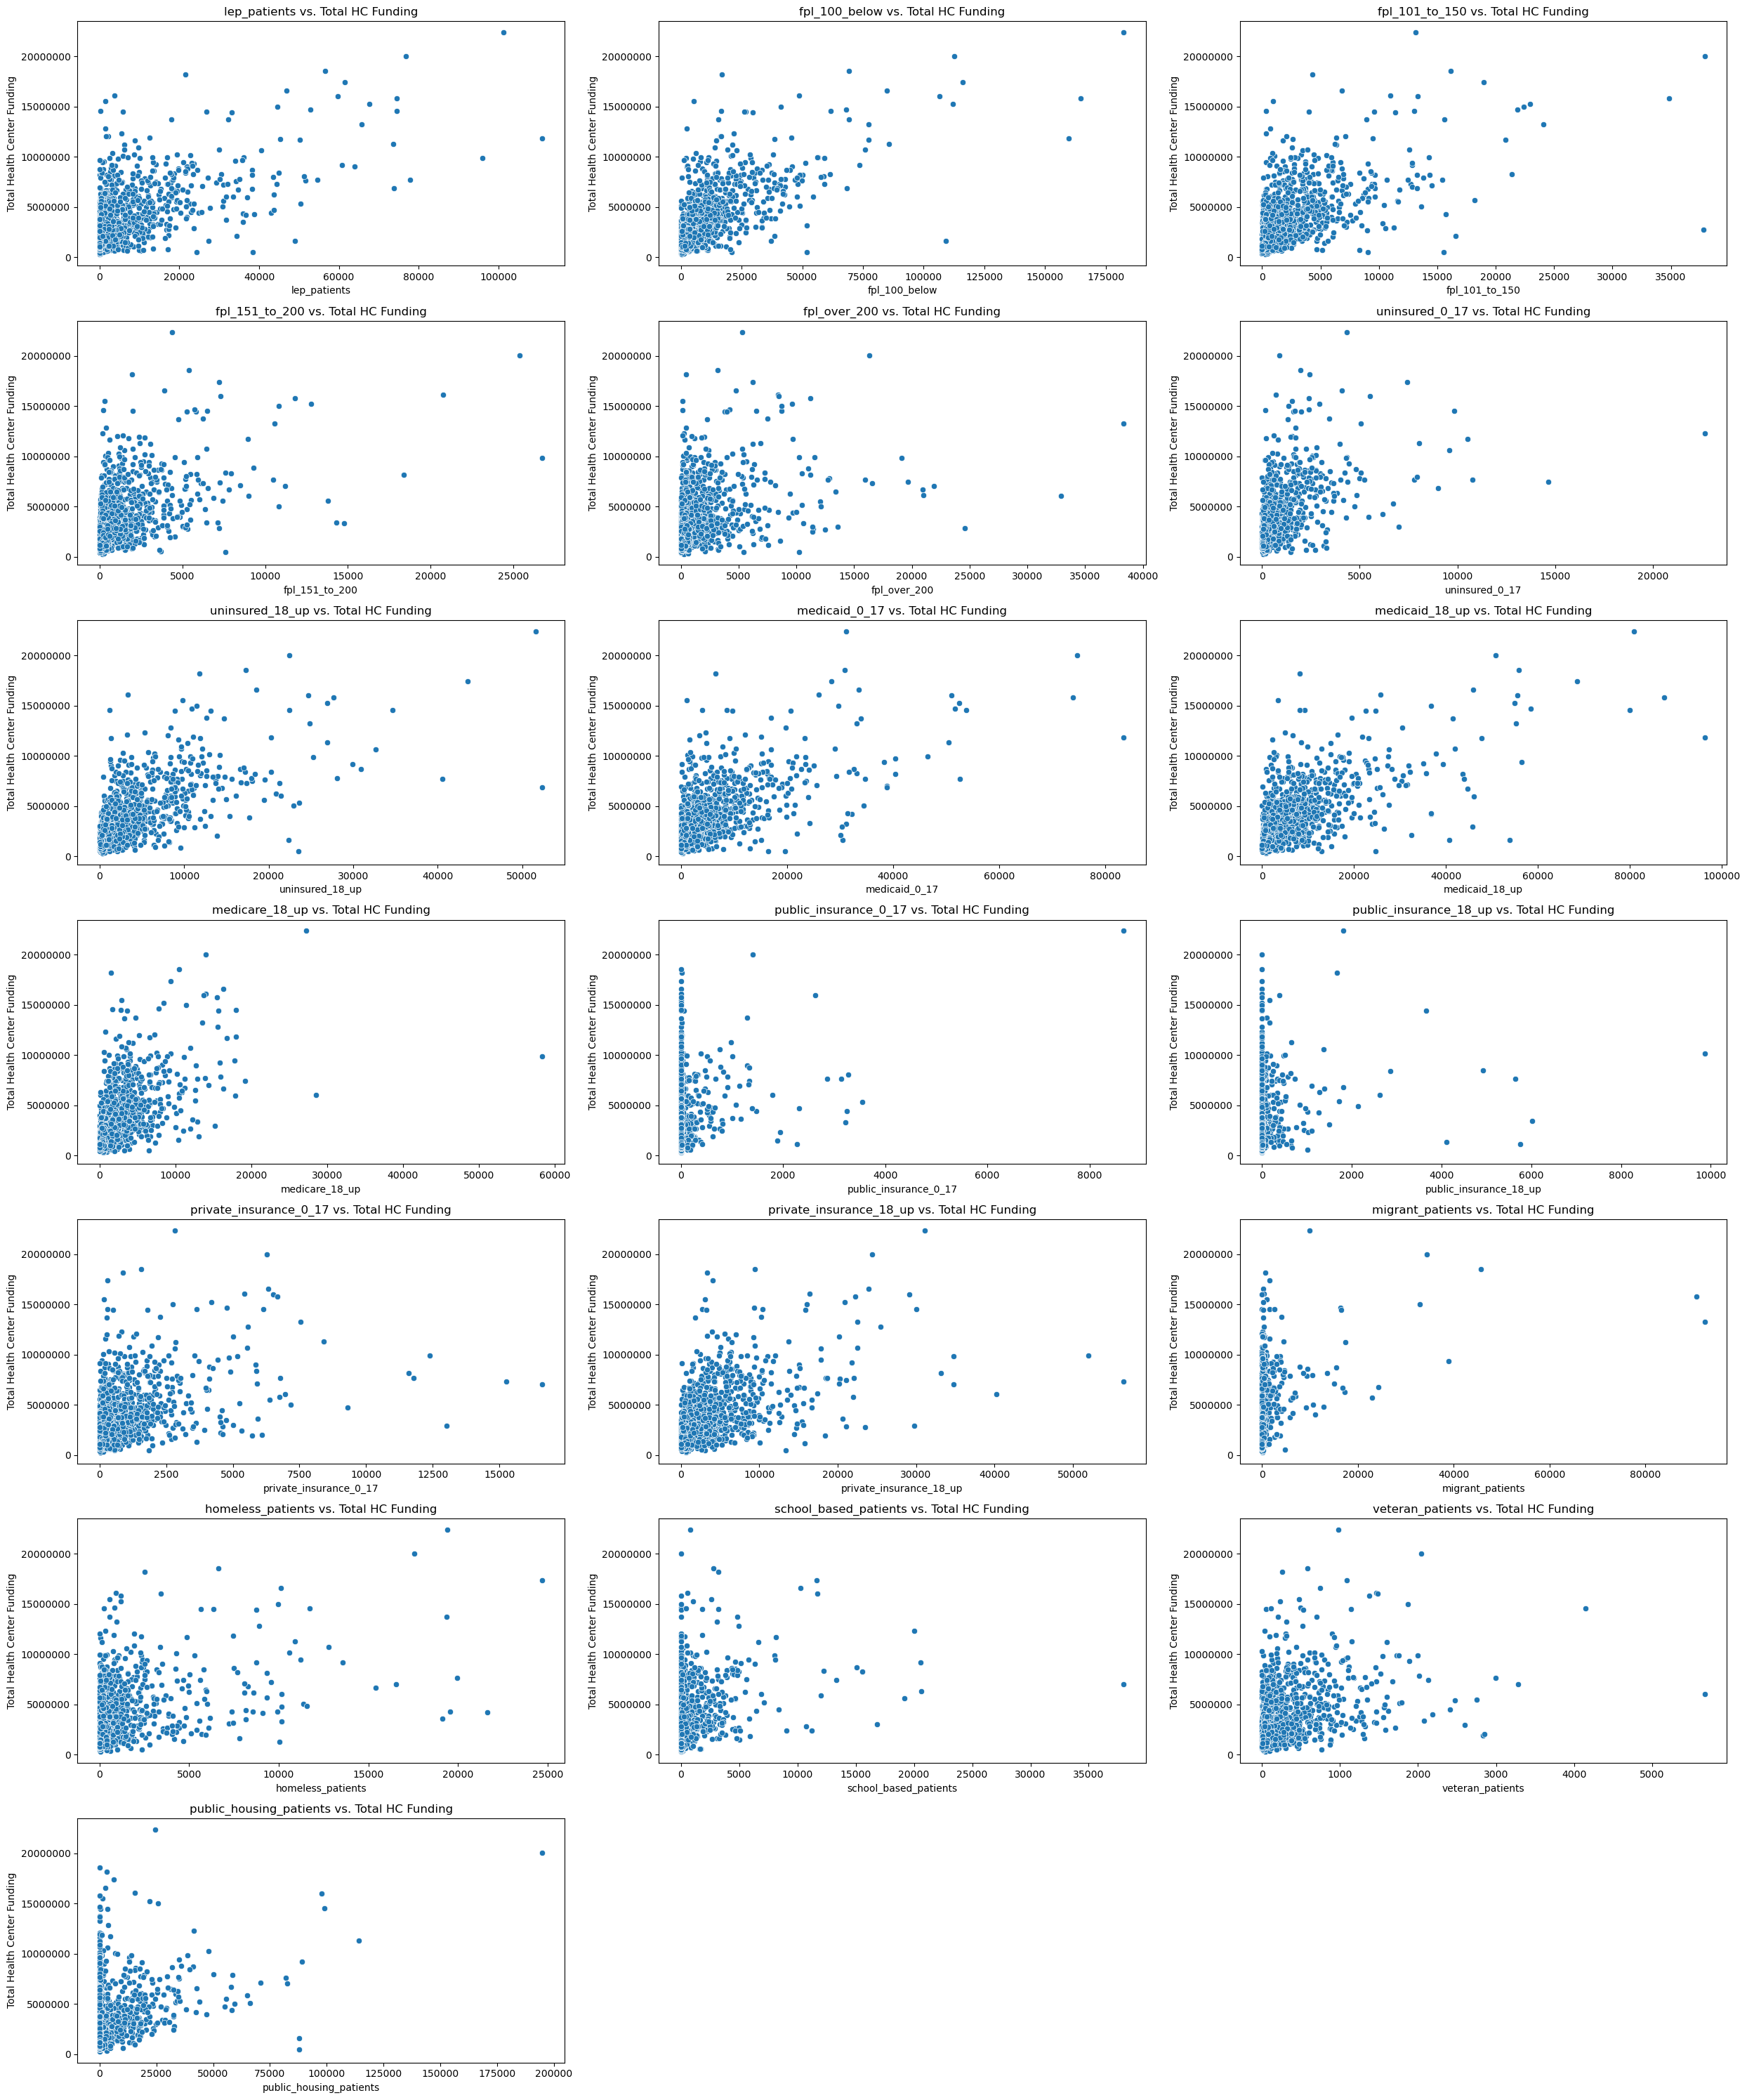

In [50]:
# Define the list of x variables you want to plot against 'total_hc_funding'
sdoh_vars = [
    'lep_patients', 'fpl_100_below', 'fpl_101_to_150', 'fpl_151_to_200', 'fpl_over_200',
    'uninsured_0_17', 'uninsured_18_up', 'medicaid_0_17', 'medicaid_18_up',
    'medicare_18_up', 'public_insurance_0_17', 'public_insurance_18_up',
    'private_insurance_0_17', 'private_insurance_18_up',
    'migrant_patients', 'homeless_patients', 'school_based_patients',
    'veteran_patients', 'public_housing_patients'
]

# create subplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(25, 30))  # Adjust the size as necessary
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop over the variables and create a scatter plot for each
for i, var in enumerate(sdoh_vars):
    sns.scatterplot(ax=axes[i], data=health_centers, x=var, y='total_hc_funding')
    axes[i].set_title(f'{var} vs. Total HC Funding')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Total Health Center Funding')
    axes[i].ticklabel_format(style='plain', axis='both')

for ax in axes[len(sdoh_vars):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [51]:
# Calculate correlation matrix
correlation_matrix = health_centers[['total_hc_funding'] + sdoh_vars].corr()

In [52]:
# Extract correlations for 'total_hc_funding' against all other variables
funding_correlations = correlation_matrix['total_hc_funding'].drop('total_hc_funding')
funding_correlations.sort_values()

public_insurance_18_up     0.150217
public_insurance_0_17      0.251398
school_based_patients      0.294560
public_housing_patients    0.315367
migrant_patients           0.354363
fpl_over_200               0.362758
veteran_patients           0.371885
private_insurance_0_17     0.421979
homeless_patients          0.427696
fpl_151_to_200             0.491576
uninsured_0_17             0.496231
private_insurance_18_up    0.525961
medicare_18_up             0.535083
fpl_101_to_150             0.574493
lep_patients               0.600684
medicaid_0_17              0.629997
uninsured_18_up            0.647646
medicaid_18_up             0.652744
fpl_100_below              0.668212
Name: total_hc_funding, dtype: float64

Although several of these features appear to be strongly correlated with funding, I believe it may be due to total patients served rather than these features themselves, similar to the observations earlier with race and ethnicity proportions. I will aggregate across age groups and then calculate proportions for each of these categories instead.

In [53]:
# create aggregations
health_centers['low_income'] = health_centers[['fpl_100_below', 'fpl_101_to_150', 'fpl_151_to_200']].sum(axis=1)
health_centers['uninsured'] = health_centers['uninsured_0_17'] + health_centers['uninsured_18_up']
health_centers['medicaid'] = health_centers['medicaid_0_17'] + health_centers['medicaid_18_up']
health_centers['public_insurance'] = health_centers['public_insurance_0_17'] + health_centers['public_insurance_18_up']
health_centers['private_insurance'] = health_centers['private_insurance_0_17'] + health_centers['private_insurance_18_up']

# poverty ratio
health_centers['poverty_ratio'] = health_centers['fpl_100_below'] / health_centers['total_patients']

In [54]:
ratio_columns = ['lep_patients', 'fpl_100_below', 'low_income', 'uninsured', 'medicaid', 'medicare_18_up', 'public_insurance', 
                 'private_insurance', 'migrant_patients', 'homeless_patients', 'school_based_patients', 'veteran_patients', 'public_housing_patients']

for col in ratio_columns:
    health_centers[col+'_ratio'] = health_centers[col] / health_centers['total_patients']

In [55]:
# drop redundant features
sdoh_to_drop = ['fpl_100_below', 
                'fpl_101_to_150', 
                'fpl_151_to_200', 
                'uninsured_0_17', 
                'uninsured_18_up', 
                'medicaid_0_17', 
                'medicaid_18_up', 
                'public_insurance_0_17', 
                'public_insurance_18_up', 
                'private_insurance_0_17', 
                'private_insurance_18_up']

health_centers = health_centers.drop(columns=sdoh_to_drop)

In [56]:
sdoh_props = ['lep_patients_ratio', 'poverty_ratio', 'low_income_ratio', 'uninsured_ratio', 'medicaid_ratio', 'medicare_18_up_ratio', 'public_insurance_ratio', 
              'private_insurance_ratio','migrant_patients_ratio', 'homeless_patients_ratio', 'school_based_patients_ratio', 'veteran_patients_ratio', 
              'public_housing_patients_ratio']

correlation_matrix = health_centers[['total_hc_funding'] + sdoh_props].corr()

funding_correlations_v2 = correlation_matrix['total_hc_funding'].drop('total_hc_funding')
funding_correlations_v2.sort_values()

veteran_patients_ratio          -0.167198
private_insurance_ratio         -0.158189
medicare_18_up_ratio            -0.137605
homeless_patients_ratio         -0.009895
public_insurance_ratio           0.001990
public_housing_patients_ratio    0.039163
school_based_patients_ratio      0.040107
uninsured_ratio                  0.044474
low_income_ratio                 0.078218
poverty_ratio                    0.117353
medicaid_ratio                   0.124336
migrant_patients_ratio           0.150783
lep_patients_ratio               0.188658
Name: total_hc_funding, dtype: float64

<Axes: >

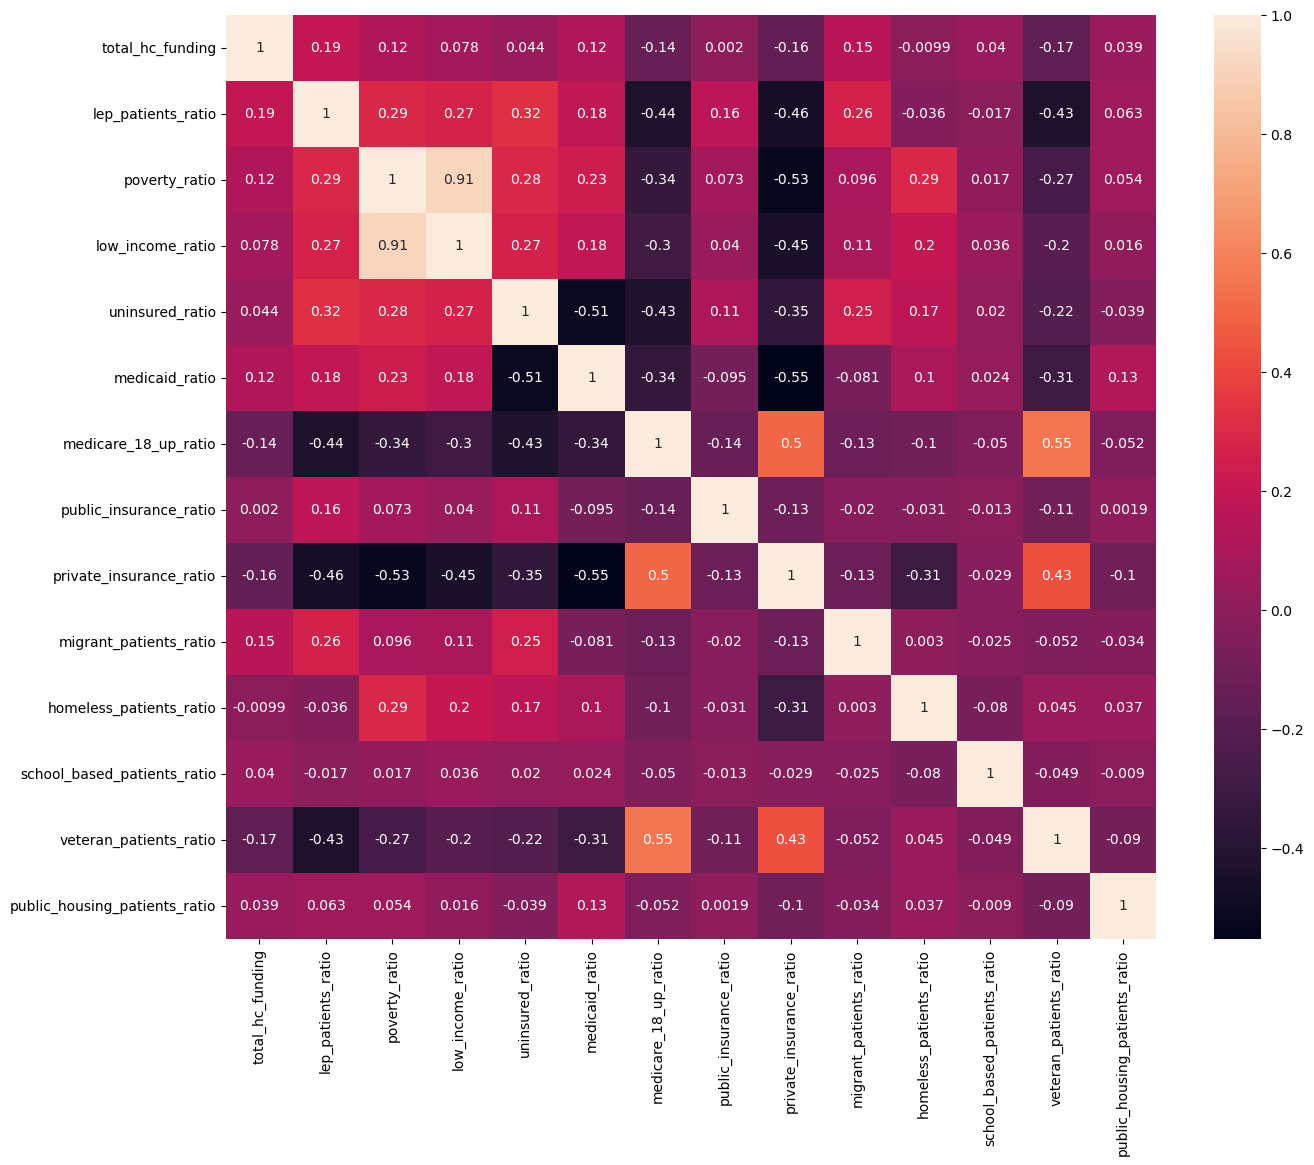

In [57]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=True)

There is some negative correlation between private health insurance and health center funding, as well as Medicare insurance and health center funding, these were not very strong correlations, -0.16 and -0.14 respectively.

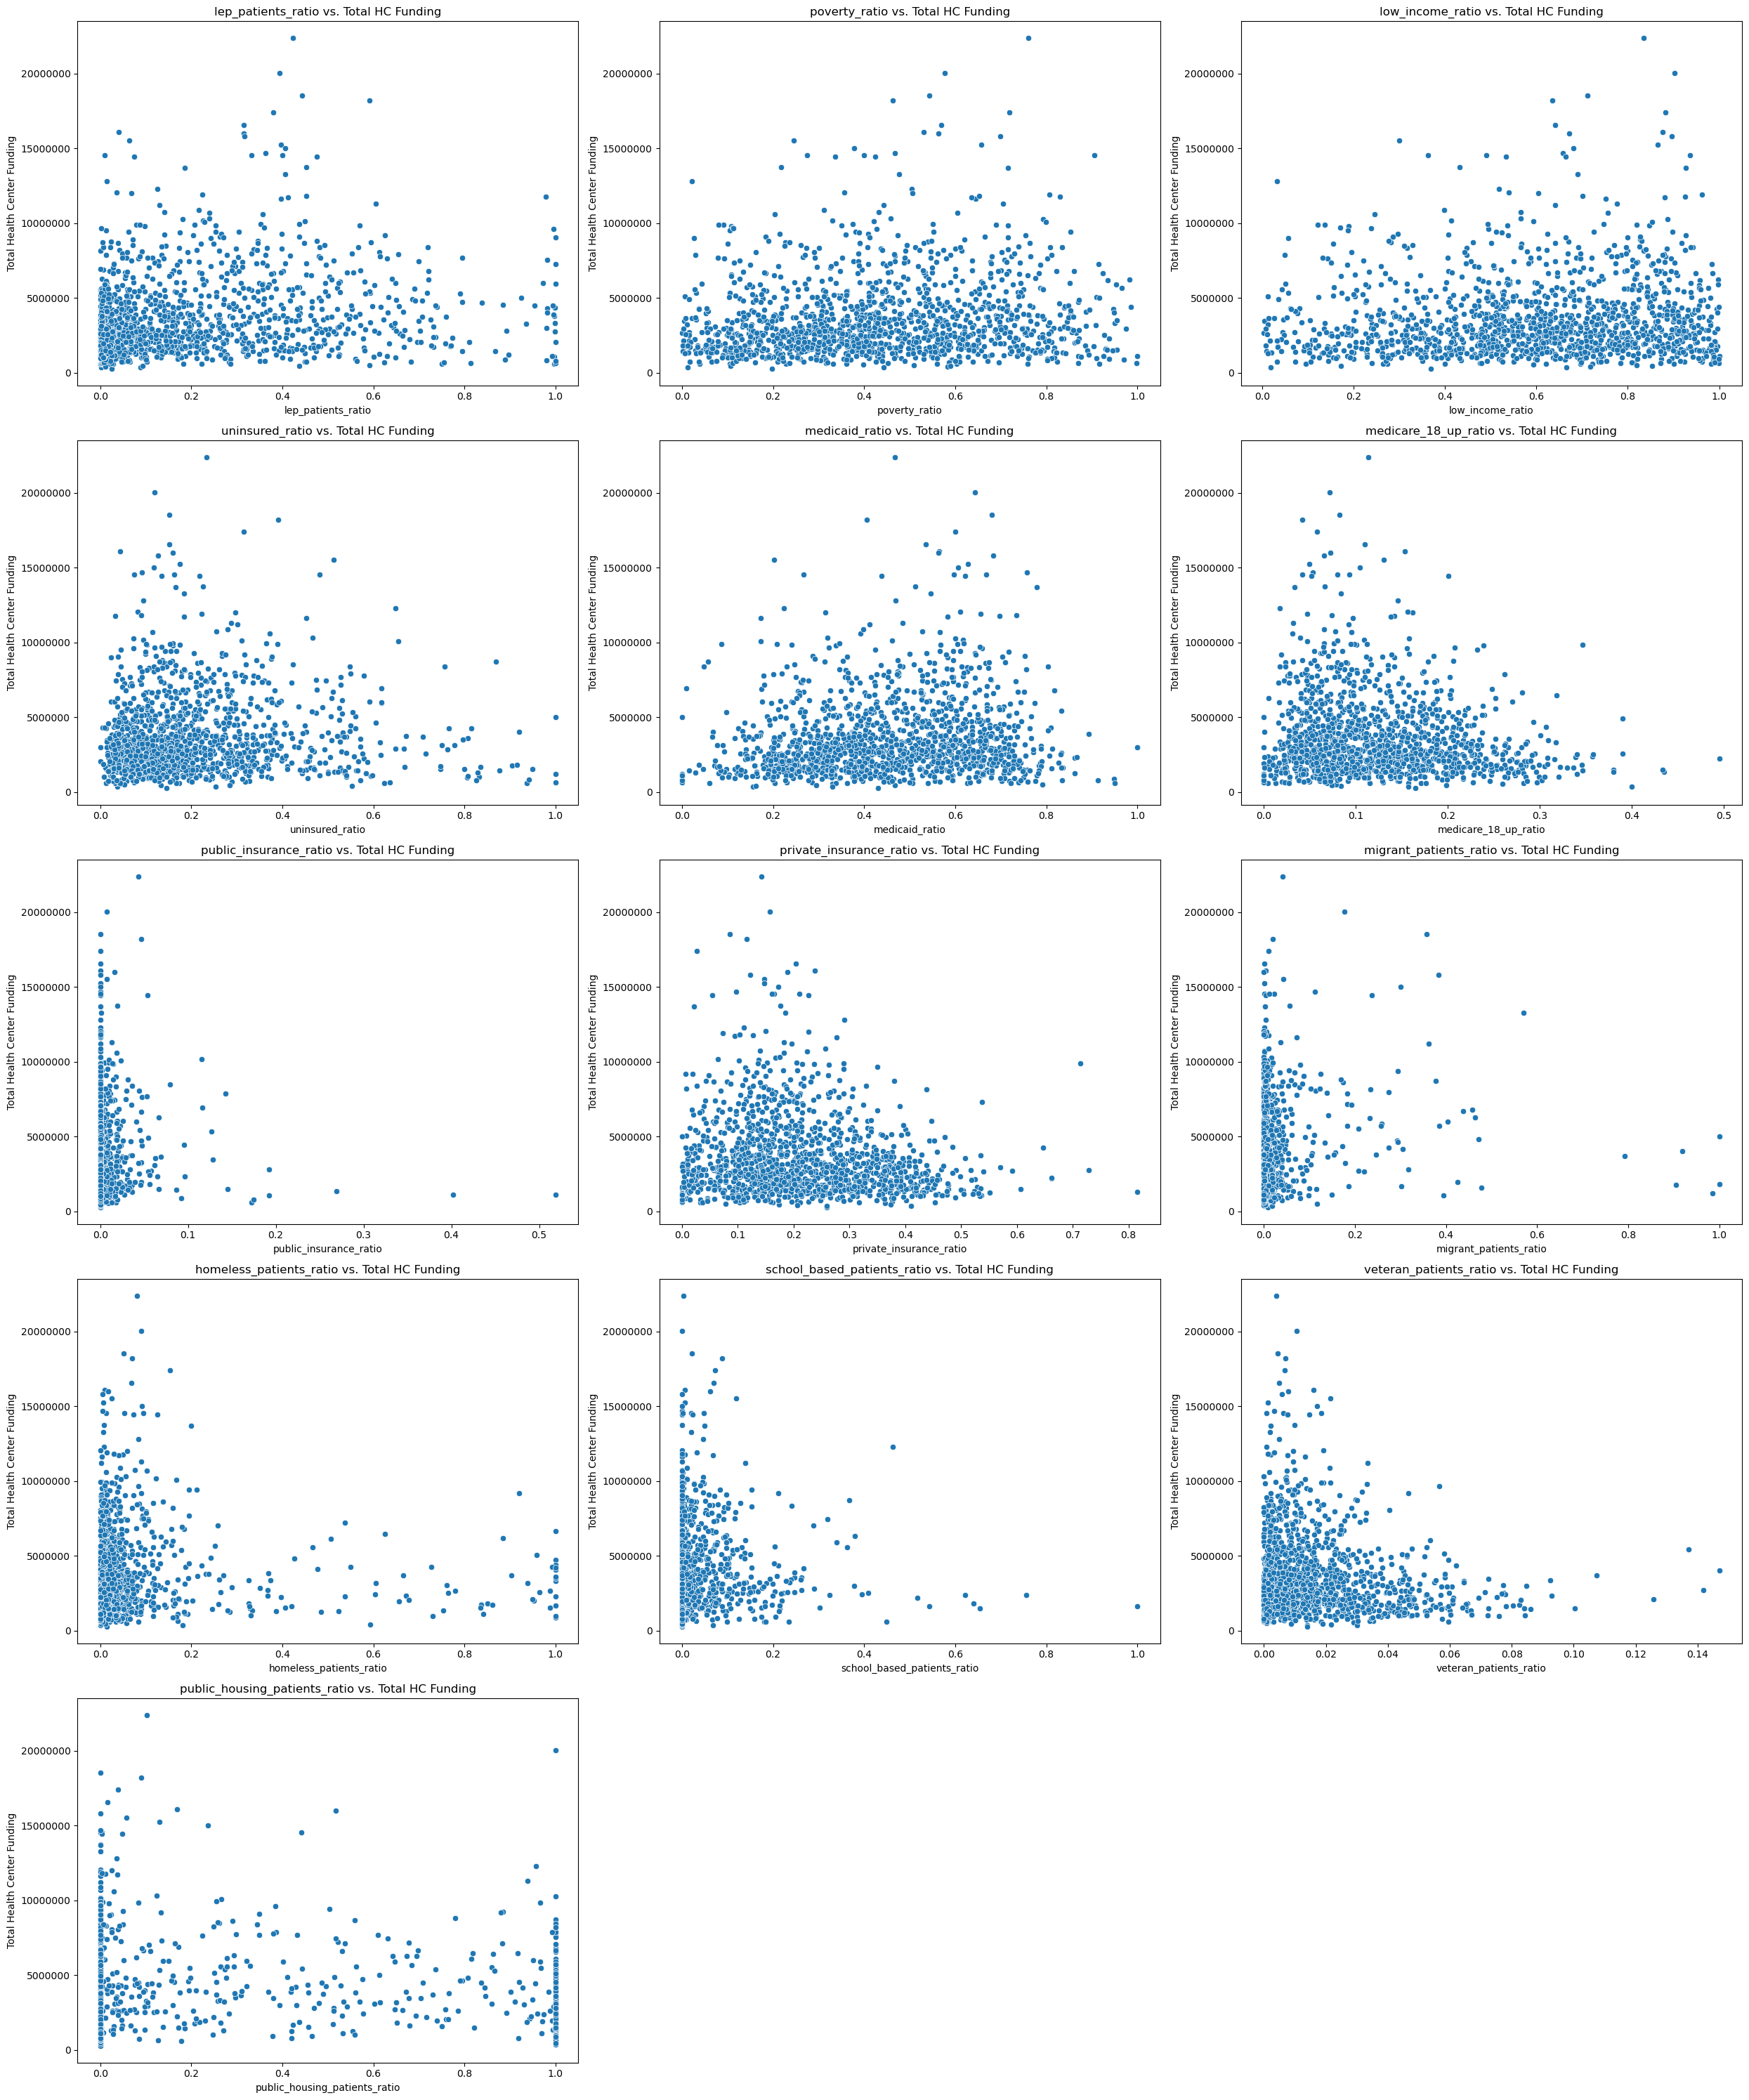

In [58]:
# create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(25, 30))
axes = axes.flatten()

# Loop over the variables and create a scatter plot for each
for i, var in enumerate(sdoh_props):
    sns.scatterplot(ax=axes[i], data=health_centers, x=var, y='total_hc_funding')
    axes[i].set_title(f'{var} vs. Total HC Funding')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Total Health Center Funding')
    axes[i].ticklabel_format(style='plain', axis='both')  # Turn off scientific notation
    
for ax in axes[len(sdoh_props):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

We see some very minor correlations between patients' social determinants of health proportions and total health center funding. I am surprised to see that there is virtually no correlation between proportion of uninsured patients and total funding received. 

## Summary of Analysis on Diversity and SDOH

What I found most interesting is that the volume of patients belonging to racial and ethnic mintorities, as well as the volume of patients with one or more social determinant of health appears to be more important for health center funding funding than the ratio of total patients served in each of these categories. I was under the assumption that the proportions would be more of a factor if health centers serve patients who are not considered high need. We will see if some of thes features have mroe importance than other later on during modeling. 

## Health Center Operations

In [59]:
# subset operations data and total funding and patients

ops = health_centers[['total_hc_funding', 'total_patients', 'total_costs_medical', 'total_costs_dental', 'total_costs_mh',
       'total_costs_enabling', 'total_costs_quality', 'total_cost_care',
       'medical_clinic_visits', 'medical_virtual_visits', 'medical_patients',
       'dental_clinic_visits', 'dental_virtual_visits', 'dental_patients',
       'mh_clinic_visits', 'mh_virtual_visits', 'mh_patients',
       'enabling_clinic_visits', 'enabling_virtual_visits',
       'enabling_patients', 'total_clinic_visits', 'total_virtual_visits',
       'ZipCode_Count', 'SiteCity_Count', 'SiteState_Count',
       'Admin_Service_Delivery_Sites_Count', 'Service_Delivery_Sites_Count',
       'TotalWeeklyHoursOfOperation']]

In [60]:
missing = ops.isna().sum().reset_index()
missing.rename(columns={0:'count_missing'}, inplace=True)
missing['perc_missing'] = ((missing['count_missing'] / len(ops)) * 100).round(2)
missing

index  count_missing  perc_missing
0                     total_hc_funding              0          0.00
1                       total_patients              0          0.00
2                  total_costs_medical            628         45.91
3                   total_costs_dental            628         45.91
4                       total_costs_mh            628         45.91
5                 total_costs_enabling            628         45.91
6                  total_costs_quality            628         45.91
7                      total_cost_care            628         45.91
8                medical_clinic_visits            579         42.32
9               medical_virtual_visits            579         42.32
10                    medical_patients            579         42.32
11                dental_clinic_visits            579         42.32
12               dental_virtual_visits            579         42.32
13                     dental_patients            579         42.32
14                    mh_clinic_visits            579         42.32
15                   mh_virtual_visits            579         42.32
16                         mh_patients            579         42.32
17              enabling_clinic_visits            579         42.32
18             enabling_virtual_visits            579         42.32
19                   enabling_patients            579         42.32
20                 total_clinic_visits            579         42.32
21                total_virtual_visits            579         42.32
22                       ZipCode_Count              0          0.00
23                      SiteCity_Count              0          0.00
24                     SiteState_Count              0          0.00
25  Admin_Service_Delivery_Sites_Count              0          0.00
26        Service_Delivery_Sites_Count              0          0.00
27         TotalWeeklyHoursOfOperation              0          0.00

The operations dataframe is missing a lot of data and it is missing not at random. During pre-processing, I want to try imputing values using MICE impuation. HOwever, I first want to look at these variables for which I do have data to see if I will keep them all or make any changes. 

In [61]:
health_centers['SiteState_Count'].value_counts()

SiteState_Count
1    1326
2      36
3       6
Name: count, dtype: int64

In [62]:
ops_correlation_matrix = ops.corr()
ops_correlation_matrix_simple = ops_correlation_matrix['total_hc_funding'].drop('total_hc_funding')
ops_correlation_matrix_simple.sort_values(ascending=False)


total_patients                        0.728653
total_costs_medical                   0.662490
total_clinic_visits                   0.656187
medical_patients                      0.648517
total_cost_care                       0.633062
medical_clinic_visits                 0.625388
total_costs_dental                    0.605486
TotalWeeklyHoursOfOperation           0.603180
dental_patients                       0.602848
dental_clinic_visits                  0.595634
Service_Delivery_Sites_Count          0.578838
total_costs_enabling                  0.565621
SiteCity_Count                        0.507559
ZipCode_Count                         0.476112
total_costs_quality                   0.446496
medical_virtual_visits                0.443506
total_virtual_visits                  0.439205
mh_patients                           0.392297
enabling_patients                     0.386485
total_costs_mh                        0.354125
enabling_clinic_visits                0.307489
mh_virtual_vi

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant to the DataFrame for intercept
X = add_constant(ops.drop(columns='total_hc_funding').dropna())

# Calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Display VIF
print(vif.round(2).sort_values('VIF Factor', ascending=False))


    VIF Factor                            features
21      537.75                total_virtual_visits
20      363.61                 total_clinic_visits
8       290.46               medical_clinic_visits
1       211.82                      total_patients
10      207.79                    medical_patients
9       200.63              medical_virtual_visits
15      120.05                   mh_virtual_visits
11       62.92                dental_clinic_visits
0        45.21                               const
13       43.26                     dental_patients
2        25.21                 total_costs_medical
7        20.58                     total_cost_care
18       17.80             enabling_virtual_visits
27       15.69         TotalWeeklyHoursOfOperation
4        15.27                      total_costs_mh
14       14.07                    mh_clinic_visits
26       12.04        Service_Delivery_Sites_Count
3        11.14                  total_costs_dental
16        9.21                 

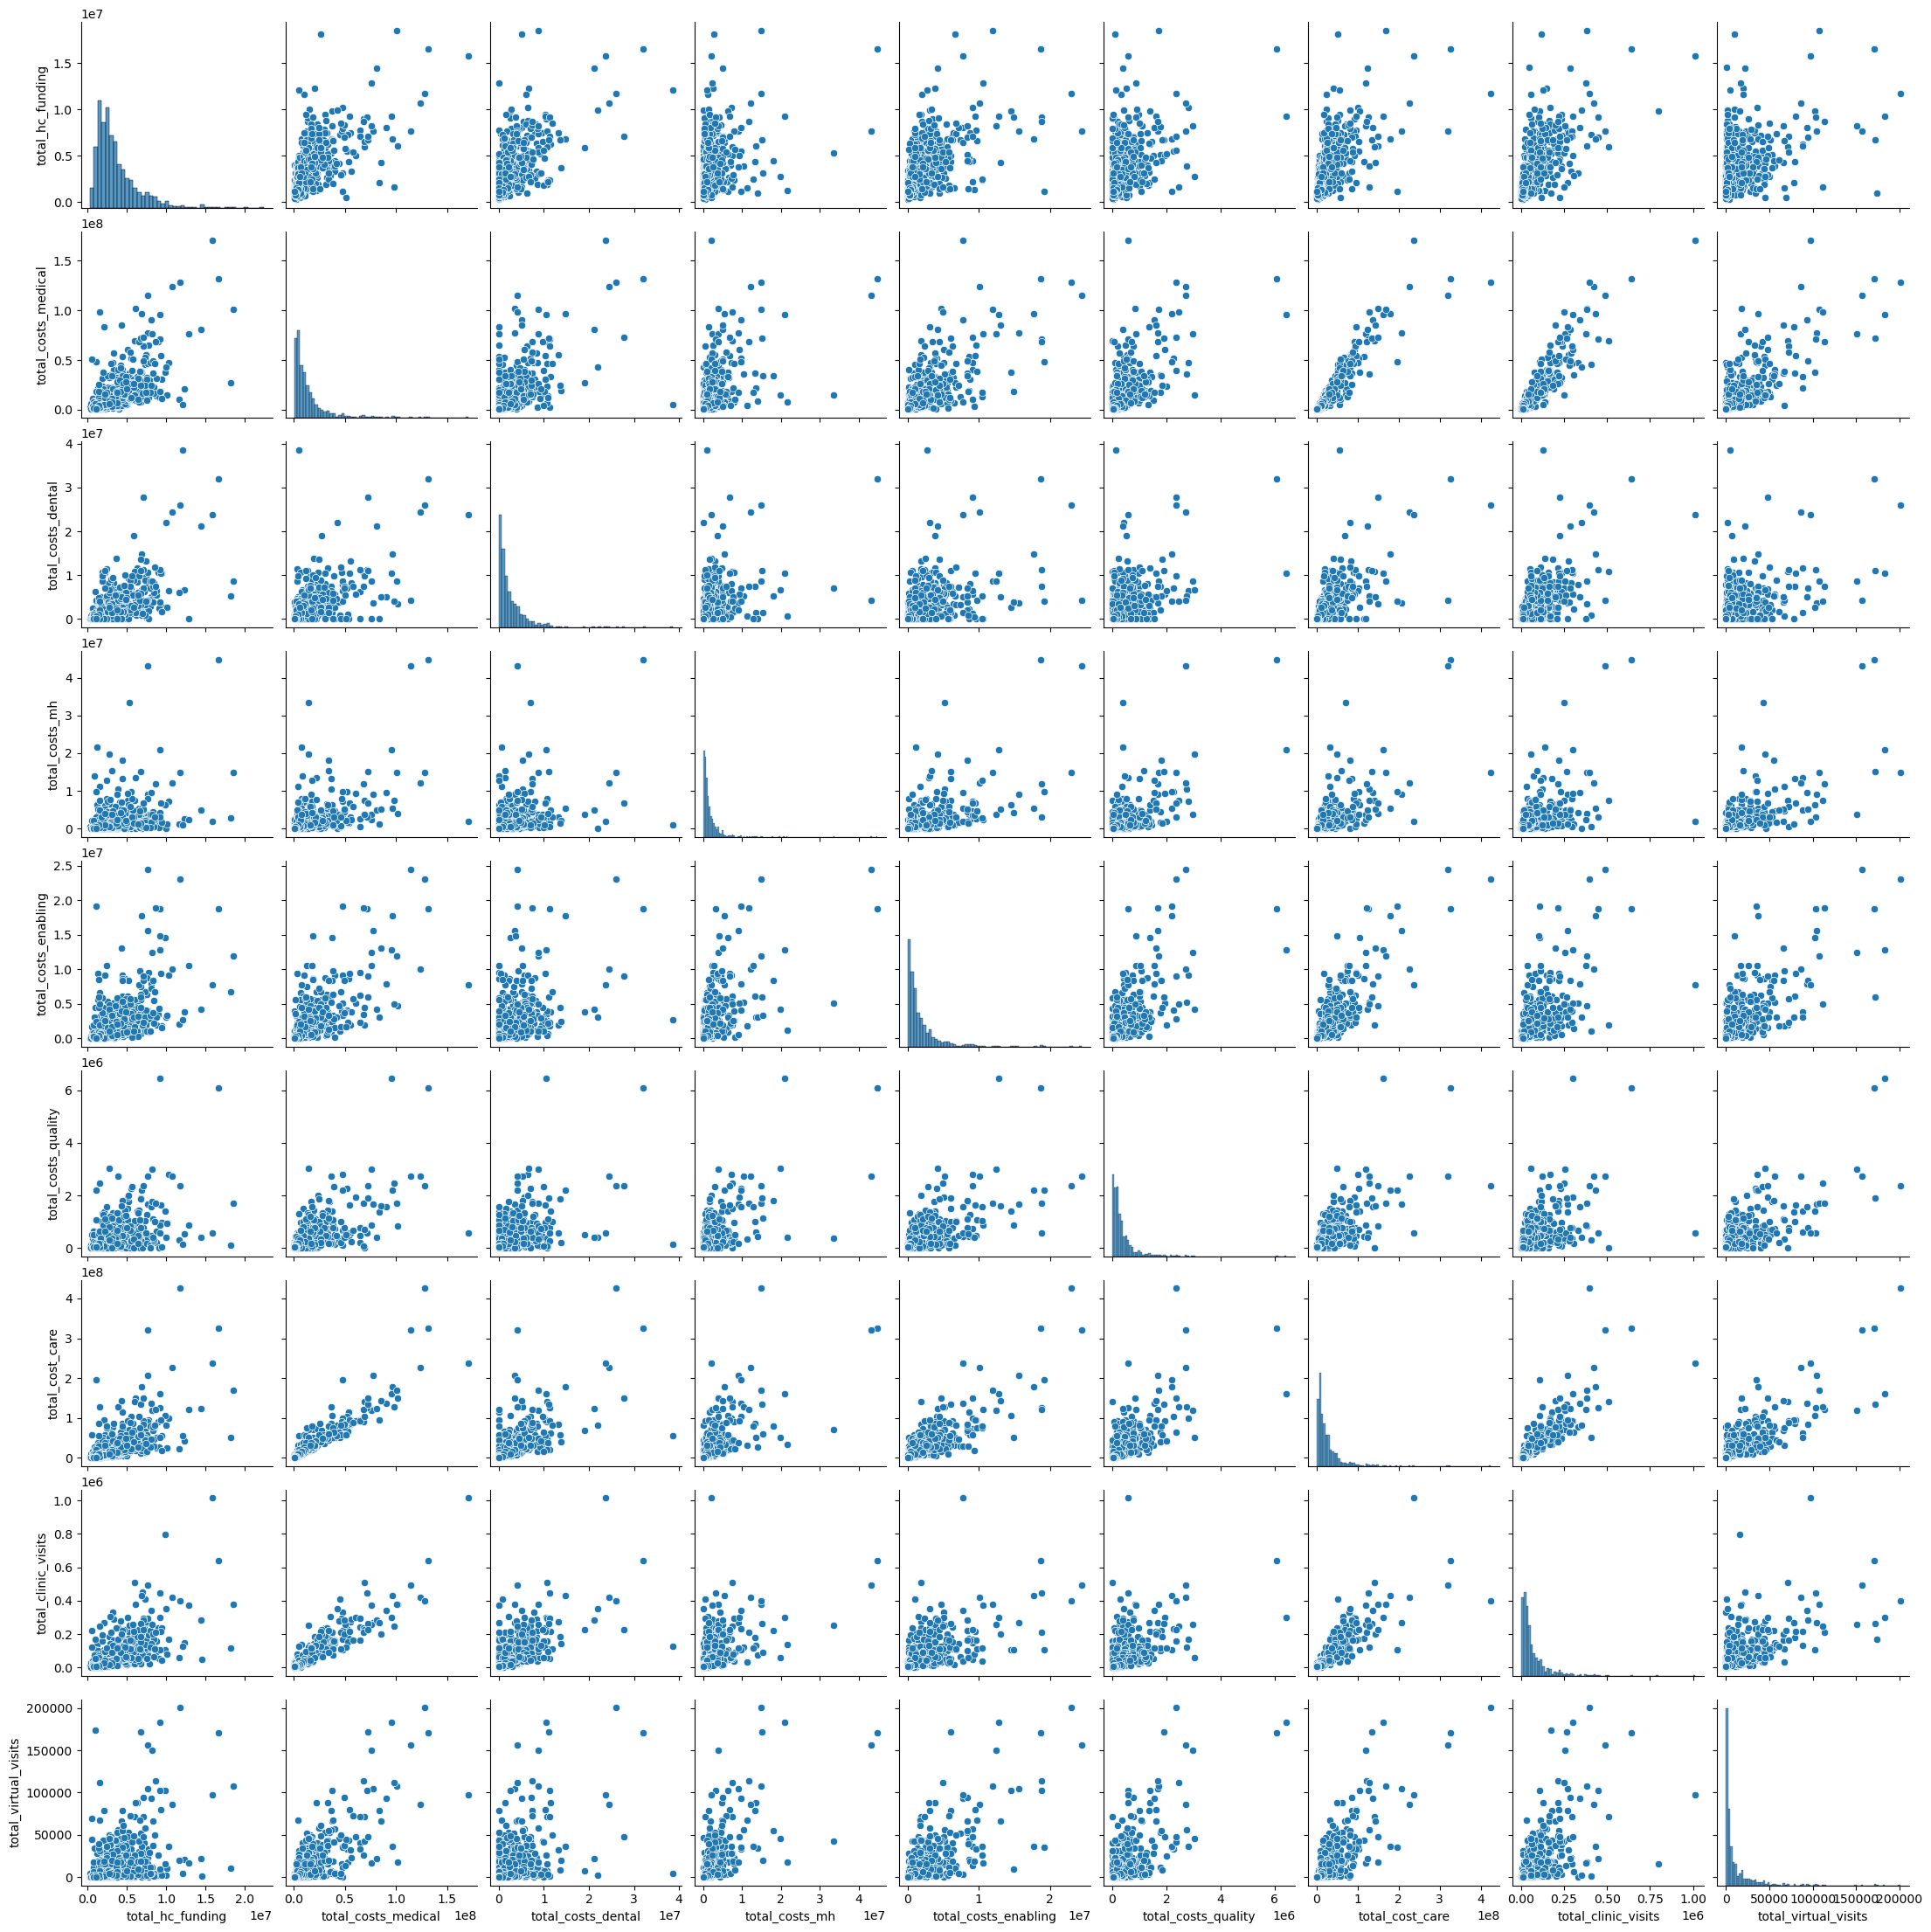

In [64]:
sns.pairplot(ops[['total_hc_funding', 'total_costs_medical', 'total_costs_dental', 'total_costs_mh',
       'total_costs_enabling', 'total_costs_quality', 'total_cost_care', 'total_clinic_visits', 'total_virtual_visits']])

## Health Center Operations Analysis
In general, we can see that total funding increases across the board with increased medical, dental, mental health, quality, and enabling service costs as well as the various types of clinical visits. Instead of keeping all of these columns, I am going to keep just the total columns for costs of care, visits, and virtual visits as they demonstrate similar trends to the more detailed columns when plotted agains total_hc_funding. These columns are also most strongly correlated with total health center funding. Additionally, there is likely some colinearity in these data because as there are increased visits, there are increased costs of care and vice versa. 

The count of administrative sites does not seem to be particularly meaningful for any relationships with overall operations. I am going to add this count to the service delivery sites column to provide a new value. I am not simply removing this column because some smaller operations may have their administrative site in the same place as their clinical services site, and it may be their only operation service site. 

The count of states entities are operating in also does not seem to provide much in terms of relationship with funding or other columns. I will remove this for modeling. 

In [65]:
#combine enabling services visit types
health_centers['total_enabling_visits'] = health_centers['enabling_clinic_visits'] + health_centers['enabling_virtual_visits']

# combine total visits (clinic and virtual)
health_centers['total_visits'] = health_centers['total_clinic_visits'] + health_centers['total_virtual_visits']

# combine admin site count and service delivery site count
health_centers['total_sites'] = health_centers['Service_Delivery_Sites_Count'] + health_centers['Admin_Service_Delivery_Sites_Count']

ops_to_drop = [
    'total_costs_medical',
    'total_costs_dental',
    'total_costs_mh',
    'total_costs_enabling',
    'total_costs_quality',
    'medical_clinic_visits',
    'medical_virtual_visits',
    'medical_patients',
    'dental_clinic_visits',
    'dental_virtual_visits',
    'dental_patients',
    'mh_clinic_visits',
    'mh_virtual_visits',
    'mh_patients',
    'enabling_clinic_visits',
    'enabling_virtual_visits',
    'total_clinic_visits',
    'total_virtual_visits',
    'Service_Delivery_Sites_Count', 
    'Admin_Service_Delivery_Sites_Count'
]

health_centers = health_centers.drop(columns=ops_to_drop)

In [66]:
# add health center funding break out columns to be removed to prevent data leakage
data_leakage_cols.extend(['mhc_amount', 'chc_amount', 'ho_amount', 'ph_amount'])
data_leakage_cols

['hc_grant_revenue_ratio',
 'bphc_total',
 'mhc_amount',
 'chc_amount',
 'ho_amount',
 'ph_amount']

In [67]:
# define columns to drop before
cols_to_drop = ['total_male', 'total_female', 'GrantNumber', 'HealthCenterCity']

In [68]:
# create new dataframe
df = health_centers.drop(columns=cols_to_drop)

Text(0.5, 0, 'Funding per patient ($)')

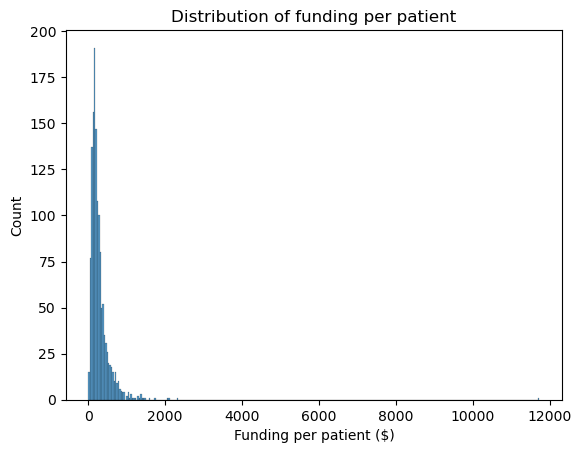

In [69]:
df['funding_per_patient'] = df['total_hc_funding'] / df['total_patients']

data_leakage_cols.append('funding_per_patient')

fig, ax = plt.subplots()
sns.histplot(df['funding_per_patient'], ax=ax)
plt.title('Distribution of funding per patient')
plt.xlabel('Funding per patient ($)')

In [70]:
df['funding_per_patient'].describe()

count     1368.000000
mean       291.554070
std        389.349924
min          5.547653
25%        141.167325
50%        214.110736
75%        343.455685
max      11727.675325
Name: funding_per_patient, dtype: float64

Interestingly there are huge outliers in this graph, with some entities receiving significantly more funding per patient than most others. There are also others that have extremely low funding per patient values.  Let's take a closer look at the data. 

This is intersting because earlier the charts demonstrate how the volume of patients served is strongly correlated with total funding. This suggests that some smaller entities receive more funding proportionally despite not serving as many patients as large entities. I am going to investigate some of the difference between these entities by grouping them and seeing if they differ in any of the newly calculated columns.

In [71]:
# define bin edges
edges = df['funding_per_patient'].quantile([0, 0.25, 0.50, 0.75, 0.90, 1]).values

# define labels for the bins
labels = ['0-25%', '25-50%', '50-75%', '75-90%', '90-100%']

# create the categorical groups
df['funding_per_patient_group'] = pd.cut(df['funding_per_patient'], bins=edges, labels=labels, include_lowest=True)

# verify the distribution among the categories
print(df['funding_per_patient_group'].value_counts())

funding_per_patient_group
0-25%      342
25-50%     342
50-75%     342
75-90%     205
90-100%    137
Name: count, dtype: int64


In [72]:
df.pivot_table(values=['uninsured_ratio', 'poverty_ratio', 'low_income_ratio', 'other_to_rev_ratio', 'diverse_race_proportion', 
                       'hispanic_proportion'], 
               index='funding_per_patient_group', aggfunc='mean')

diverse_race_proportion  hispanic_proportion  \
funding_per_patient_group                                                 
0-25%                                     0.212287             0.319589   
25-50%                                    0.206896             0.310067   
50-75%                                    0.250763             0.266771   
75-90%                                    0.285127             0.256755   
90-100%                                   0.340388             0.213072   

                           low_income_ratio  other_to_rev_ratio  \
funding_per_patient_group                                         
0-25%                              0.582211            0.074206   
25-50%                             0.598459            0.050008   
50-75%                             0.606380            0.050951   
75-90%                             0.594237            0.039732   
90-100%                            0.568322            0.041956   

                           poverty_ratio  uninsured_ratio  
funding_per_patient_group                                  
0-25%                           0.422879         0.159150  
25-50%                          0.424370         0.184097  
50-75%                          0.442386         0.213488  
75-90%                          0.441020         0.254958  
90-100%                         0.437834         0.270488

It appears that the entities with more funding per patient have more diverse patient populations and higher uninsured rates among their patients. 

In [73]:
df.pivot_table(values=['migrant_patients_ratio', 'homeless_patients_ratio', 'school_based_patients_ratio', 'veteran_patients_ratio', 
                       'public_housing_patients_ratio'], 
               index='funding_per_patient_group', aggfunc='mean')

homeless_patients_ratio  migrant_patients_ratio  \
funding_per_patient_group                                                    
0-25%                                     0.031963                0.017242   
25-50%                                    0.041329                0.023750   
50-75%                                    0.040801                0.019598   
75-90%                                    0.097198                0.022520   
90-100%                                   0.210375                0.043456   

                           public_housing_patients_ratio  \
funding_per_patient_group                                  
0-25%                                           0.203099   
25-50%                                          0.181476   
50-75%                                          0.209749   
75-90%                                          0.215225   
90-100%                                         0.162909   

                           school_based_patients_ratio  veteran_patients_ratio  
funding_per_patient_group                                                       
0-25%                                         0.026787                0.012719  
25-50%                                        0.041109                0.015683  
50-75%                                        0.030348                0.017531  
75-90%                                        0.022275                0.019775  
90-100%                                       0.015101                0.023780

Additionally, it appears the entities with more funding per patient serve higher proportions of their patients who are homeless or migrants cmopared to other health centers. Of these, homelessness seems to be a larger factor. 

In [74]:
df.pivot_table(values=['total_sfs', 'total_visits', 
                       'ZipCode_Count', 'SiteCity_Count', 'total_sites', 'TotalWeeklyHoursOfOperation', 
                       'total_grant_funding', 'total_patients'], 
               index='funding_per_patient_group', aggfunc='mean').apply(lambda x: x.apply('{0:.2f}'.format))

SiteCity_Count TotalWeeklyHoursOfOperation  \
funding_per_patient_group                                              
0-25%                               6.64                      728.90   
25-50%                              4.90                      434.94   
50-75%                              3.84                      298.71   
75-90%                              2.96                      261.00   
90-100%                             3.19                      252.29   

                          ZipCode_Count total_grant_funding total_patients  \
funding_per_patient_group                                                    
0-25%                            114.16          9024157.84       47446.82   
25-50%                            72.10          5532053.79       22244.64   
50-75%                            56.37          3299551.24       13262.27   
75-90%                            40.65          2641139.38        7774.67   
90-100%                           34.39          2024550.53        4001.48   

                            total_sfs total_sites total_visits  
funding_per_patient_group                                       
0-25%                      4613968.35       17.66    176122.71  
25-50%                     2569299.66       11.73     85882.98  
50-75%                     1594730.57        7.84     47983.05  
75-90%                     1275656.82        7.01     29455.52  
90-100%                     663498.89        5.94     16269.29

In [75]:
data_leakage_cols.append('funding_per_patient_group')

In [76]:
df = df.drop(columns=data_leakage_cols)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   BHCMISID                       1368 non-null   object  
 1   HealthCenterName               1368 non-null   object  
 2   HealthCenterState              1368 non-null   object  
 3   FundingCHC                     1368 non-null   bool    
 4   FundingMHC                     1368 non-null   bool    
 5   FundingHO                      1368 non-null   bool    
 6   FundingPH                      1368 non-null   bool    
 7   UrbanRuralFlag                 1368 non-null   object  
 8   total_hc_funding               1368 non-null   int64   
 9   total_other_revenue            1368 non-null   int64   
 10  total_revenue                  1368 non-null   int64   
 11  hispanic_any_race              1368 non-null   int64   
 12  total_patients                 136

In [78]:
df['ops_confidential'] = df['total_visits'].isnull().astype('int')
df['fin_confidential'] = df['total_cost_care'].isnull().astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   BHCMISID                       1368 non-null   object  
 1   HealthCenterName               1368 non-null   object  
 2   HealthCenterState              1368 non-null   object  
 3   FundingCHC                     1368 non-null   bool    
 4   FundingMHC                     1368 non-null   bool    
 5   FundingHO                      1368 non-null   bool    
 6   FundingPH                      1368 non-null   bool    
 7   UrbanRuralFlag                 1368 non-null   object  
 8   total_hc_funding               1368 non-null   int64   
 9   total_other_revenue            1368 non-null   int64   
 10  total_revenue                  1368 non-null   int64   
 11  hispanic_any_race              1368 non-null   int64   
 12  total_patients                 136

These entities seem to also be smaller operations on average, as is show by the table above. 

## Concluding Thoughts

Overall the size of an entity's operation, measured by the number of service provided, number of patients, hours of operations, number of sites, number of zipcodes, number of cities, and total revenue streams (including patient and non-patient revenue), are positively correlated with their total health center grant funding. However, we saw earlier that there are outliers where there are a number organizations that serve smaller patient populations but receive large grants. These entities receive much more funding per patient than several of the largest operations, and some of the main features associated with these difference include higher uninsured patient ratios, diverse patient ratios, homeless patient ratios, and smaller operational capacities. 

New entities may want to prioritize funding per patient versus total overall health center grant funding. 

Although I didn't observe very strong correlations between the ratio of patients in certain demographic groups and total health center funding, I want to conduct some statistical tests to determine if various demographic factors or demographic factors combined contribute to funding levels, as I observed after splitting up entities based on their funding per patient. Similarly, I want to see if there is a statistically significant difference in entities based on special populations funding, being an urban vs rural provider, and amount of other non-patient revenue. 

In [80]:
df.to_csv(DATA_PATH +'data_new_features.csv', index=False)